# Project: Automatic Description Generation for IKEA Items Based on Image

### ID : 314994716 (Ariel Hezi)
### ID : 209207067 (Chen Abitbul)

# IKEA Image Scraper

In [29]:
import os
import requests
from bs4 import BeautifulSoup
from urllib.parse import urlparse

url = 'https://www.ikea.com/us/en/cat/tables-desks-fu004/'
save_folder = r'C:\Users\ariel\Desktop\IkeaImages'  # Specify the folder path where you want to save the images

try:
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception for 4xx and 5xx status codes

    soup = BeautifulSoup(response.text, 'html.parser')
    for img in soup.find_all('img'):
        img_url = img.get("src")
        if img_url:
            print(img_url)
            filename = urlparse(img_url).path.split("/")[-1].split("?")[0]  # Extract filename and remove query parameters
            filepath = os.path.join(save_folder, filename)  # Join folder path with filename
            img_response = requests.get(img_url)
            with open(filepath, "wb") as file:
                file.write(img_response.content)
                print(f"Saved image: {filename}")

except requests.exceptions.RequestException as e:
    print("Error fetching URL:", e)


https://www.ikea.com/us/en/static/ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: ikea-logo.f7d9229f806b59ec64cb.svg
https://www.ikea.com/us/en/static/ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: ikea-logo.f7d9229f806b59ec64cb.svg
https://www.ikea.com/global/assets/range-categorisation/images/desks-computer-desks-20649.jpeg?imwidth=300
Saved image: desks-computer-desks-20649.jpeg
https://www.ikea.com/global/assets/range-categorisation/images/dining-tables-21825.jpeg?imwidth=300
Saved image: dining-tables-21825.jpeg
https://www.ikea.com/us/en/range-categorisation/images/accent-tables-10705.jpeg?imwidth=300
Saved image: accent-tables-10705.jpeg
https://www.ikea.com/us/en/range-categorisation/images/nightstands-20656.jpeg?imwidth=300
Saved image: nightstands-20656.jpeg
https://www.ikea.com/global/assets/range-categorisation/images/console-tables-16246.jpeg?imwidth=300
Saved image: console-tables-16246.jpeg
https://www.ikea.com/global/assets/range-categorisation/images/cafe-tables-19143

# Web Scraping IKEA Product Images & Description

In [ ]:
import os
import requests
from bs4 import BeautifulSoup
from urllib.parse import urlparse, urljoin
import time

url_base = 'https://www.ikea.com/us/en/cat/sofas-sectionals-fu003/'
save_folder = r'C:\Users\ariel\Desktop\IkeaImages'  # Specify the folder path where you want to save the images
max_retries = 3  # Maximum number of retries
retry_delay = 1  # Delay between retries in seconds

def download_image(img_url, filepath):
    try:
        img_response = requests.get(img_url)
        img_response.raise_for_status()  # Raise an exception for 4xx and 5xx status codes
        with open(filepath, "wb") as file:
            file.write(img_response.content)
        print(f"Saved image: {filepath}")
        return True
    except requests.exceptions.RequestException as e:
        print(f"Error fetching image {img_url}: {e}")
        return False

def process_page(page_url):
    try:
        response = requests.get(page_url)
        response.raise_for_status()  # Raise an exception for 4xx and 5xx status codes
        soup = BeautifulSoup(response.text, 'html.parser')
        for product_link in soup.find_all('a', href=True):
            product_url = urljoin(page_url, product_link['href'])
            product_response = requests.get(product_url)
            product_response.raise_for_status()
            product_soup = BeautifulSoup(product_response.text, 'html.parser')
            # Find image tags on the product page and extract their source URLs
            for img_tag in product_soup.find_all('img', src=True):
                img_url = urljoin(product_url, img_tag['src'])
                # Extract filename from the URL
                filename = urlparse(img_url).path.split("/")[-1].split("?")[0]
                # Create folder based on product URL path
                folder_name = urlparse(product_url).path.strip('/').replace('/', '_') if urlparse(product_url).path.strip('/') else "uncategorized"
                # Create the folder if it doesn't exist
                folder_path = os.path.join(save_folder, folder_name)
                os.makedirs(folder_path, exist_ok=True)
                # Build the full filepath
                filepath = os.path.join(folder_path, filename)
                retries = 0
                while retries < max_retries:
                    if download_image(img_url, filepath):
                        break
                    retries += 1
                    print(f"Retrying... Attempt {retries}")
                    time.sleep(retry_delay)  # Wait before retrying
                else:
                    print(f"Failed to download image {filename} after {max_retries} attempts.")
    except requests.exceptions.RequestException as e:
        print("Error fetching URL:", e)
    except Exception as e:
        print("An error occurred:", e)

try:
    page_number = 1
    while True:
        page_url = f"{url_base}?page={page_number}"
        process_page(page_url)
        page_number += 1
        # Add a delay between page requests
        time.sleep(1)  # You may adjust the delay according to your needs
except KeyboardInterrupt:
    print("Process interrupted by the user.")


Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\fabric-sofas-10661.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\leather-coated-fabric-sofas-10662.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\sectionals-16238.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\sofa-beds-10663.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\ottomans-footstools-pouffes-20926.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\chaise-longues-57527.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\sofa-parts-accessories-700299.jpeg
Save

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\kivik-sectional-5-seat-corner-tresund-light-beige__1124072_pe874989_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\kivik-sectional-

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\hyltarp-sofa-hemmesta-light-beige__1193808_pe901635_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\hyltarp-sofa-kilanda-pale-blue__1193800_pe901645_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\hyltarp-sofa-gransel-gray-brown__1193816_pe901643_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\hyltarp-sofa-hemmesta-gray-green__1193812_pe901639_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\hyltarp-sofa-tallmyra-dark-green__1193802_pe901629_s5.jpg
Saved image: C:

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_products-products\storage-organization-st001.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_products-products\kitchen-appliances-ka001.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_products-products\beds-mattresses-bm001.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_products-products\lighting-li001.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_products-products\textiles-tl001.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_products-products\decoration-de001.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_products-products\cookware-tableware-kt001.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_products-products\baby-children-bc001.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_products-products\rugs-rm001.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_products-products\bathroom-ba001.jpeg
Saved im

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\fejka-artificial-potted-plant-indoor-outdoor-daffodil-white__1247686_pe922720_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Sav

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\fejka-artificial-potted-plant-moss__1248027_pe922940_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\green-bedroom-with-green-plants-pillows-and-blankets-244378b26b3411b1014aeae5f43f0a3a.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\decorative-stoneware-and-ceramic-plateware-bowls-in-blue-and-7628506aa143db91249a9e4b2c3ae48b.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\pink-roses-bdc68c338ff4f56e3f016158e4640ac3.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\red-candles-with-or-without-candle-holders-on-a-red-table-baf81b08eb2c1d5ac8c2071fcb8ec5ac.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\woman-in-pajamas-sleeping-on-a-yellow-pillow-and-covered-by--e443fa2d5fc6e42e8400e07584c0f38a.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\black-throw-pillows

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family_discounts\haellespring-comforter-and-pillowcase-s-dark-blue-cooler__0756021_pe748695_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family_discounts\haellespring-comforter-and-pillowcase-s-gray-cooler__0756057_pe748713_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family_discounts\trattviva-bedspread-dark-gray-green__1187283_pe899161_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family_discounts\spristands-flat-sheet-light-gray__1161025_pe889261_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family_discounts\spristands-flat-sheet-light-gray__1161025_pe889261_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family_discounts\faeltnarv-comforter-and-pillowcase-s-beige-blue-check__1150102_pe884354_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found f

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family_discounts\kaernmott-comforter-and-pillowcase-s-white__1150101_pe884353_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family_discounts\roseniberis-comforter-and-pillowcase-s-pink-floral-pattern__1150096_pe884349_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family_discounts\nattjasmin-flat-sheet-beige__1189809_pe900005_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family_discounts\nattjasmin-flat-sheet-beige__1189809_pe900005_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family_discounts\nattjasmin-flat-sheet-beige__1189809_pe900005_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family_discounts\nattjasmin-flat-sh

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\PH186380-crop001.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\PH192229-crop001.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\PH185849-crop001.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\PH191094.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\chair-11ae63aae103f58fdfe4e5108d395c9d.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\person-stretching-0bad0cc5a645cb8a54881d51da3e9b57.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\PH194924-crop003.jpg
Saved image: C:\Users\ariel\Deskto

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\bild-poster-you-are-amazing__1224669_pe915061_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\ragodling-stor

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\baggmuck-shoe-tray-indoor-outdoor-dark-yellow__1215245_pe911924_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\U

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms\a-calm-bedroom-with-a-large-bed-a-wooden-desk-a-dynamic-gray-777dbcd1df641dcf684c3c0518ed355b.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms\PH193360.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms\a-small-kitchen-with-matte-white-voxtorp-fronts-white-walls--abee584a05e766f1d1e09198d617d550.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms\a-room-at-home-with-a-dark-grey-lidkullen-active-sit-stand-s-4d6395de0e5fb225025d9525a504bce2.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms\PH196165.JPG
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms\PH196359.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms\PH195943.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms\PH196248.JPG
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms\PH196088.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms\a-yellow-tiled-laundry-room-with-a-whi

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family_discounts\kaernmott-comforter-and-pillowcase-s-white__1150101_pe884353_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family_discounts\roseniberis-comforter-and-pillowcase-s-pink-floral-pattern__1150096_pe884349_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family_discounts\myrgramal-comforter-and-pillowcase-s-black__1150098_pe884351_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection a

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family_discounts\roseniberis-comforter-and-pillowcase-s-pink-floral-pattern__1150096_pe884349_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family_discounts\roseniberis-comforter-and-pillowcase-s-pink-floral-pattern__1150097_pe884350_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family_discounts\roseniberis-comforter-and-pillowcase-s-pink-floral-pattern__1150097_pe884350_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2


Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family_discounts\nattjasmin-flat-sheet-beige__1189809_pe900005_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family_discounts\nattjasmin-flat-sheet-beige__1189809_pe900005_s5

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_ikea-food-restaurant-fb001\vegetarian-plant-based-25213.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_ikea-food-restaurant-fb001\beverages-25211.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_ikea-food-restaurant-fb001\selection-of-desserts-available-at-the-ikea-swedish-food-mar-16700daa0947eff4e1882f77dfa10a01.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_ikea-food-restaurant-fb001\PH171760.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_ikea-food-restaurant-fb001\three-people-holding-hot-dogs-with-ketchup-and-mustard-on-th-ce506366f59cf3ca7d47e0b6bfb2f1c6.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_ikea-food-restaurant-fb001\salmon-meal-with-sides-on-a-plate-a2facc6089584b9185e6d6c9e31d5088.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_ikea-food-restaurant-fb001\family-enjoying-a-meal-at-the-ikea-restaurant-482835ba59ec8b496442212f762b0bd

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_new\akernejlika-cushion-cover-beige-embroidery__1224800_pe915108_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\chiafroen-plant-pot-indoor-outdoor-green__1212245_pe910542_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\korken-bottle-with-stopper-clear-glass__0915381_pe784758_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\PH1

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\flottilj-desk-lamp-beige__1177509_pe895347_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\Ik

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_best-sellers\billy-bookcase-white__0625599_pe692385_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_best-sellers\malm-6-drawer-dresser-white__0484884_pe621348_s5.jpg
Error fetchi

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_best-sellers\malm-2-drawer-chest-black-brown__1154559_pe886158_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_best-sellers\malm-4-drawer-chest-white__0484879_pe621344_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Err

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_best-sellers\slattum-upholstered-bed-frame-knisa-light-gray__0768244_pe754388_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection ad

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_offers_last-chance\besta-tv-bench-with-doors-white-bergsviken-beige__0993145_pe820443_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_offers_last-chance\besta-tv-unit-with-doors-white-selsviken-high-gloss-beige__0719198_pe731913_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_offers_last-chance\besta-tv-unit-with-doors-black-brown-selsviken-high-gloss-beige__0719195_pe731921_s5.jpg
Saved image: C:

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_offers_last-chance\variera-box-white__0113067_pe265130_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_offers_last-chance\variera-box-white__0626879_pe693057_s5.jpg
Saved image: C:\Users

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_offers_last-chance\pagodtraed-duvet-cover-and-pillowcase-s-white-dark-blue__1011987_pe828690_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_offers_last-chance\pagodtraed-duvet-cover-and

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_offers_last-chance\besta-tv-unit-with-drawers-and-door-white-kallviken-dark-gray__0988820_pe818232_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_offers_last-chance\besta-tv-unit-with-drawers-and-door-white-bergsviken-black__0988819_pe818244_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_offers_last-chance\besta-tv-unit-with-drawers-and-door-white-laxviken-white__1012784_pe828994_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_offers_last-chance\saxborga-storage-box-with-mirrored-lid-plastic-cork__0711884_pe728530_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_furniture-fu001\cabinets-cupboards-st003.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_furniture-fu001\outdoor-furniture-od003.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_furniture-fu001\sideboards-buffets-console-tables-30454.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_furniture-fu001\wardrobes-19053.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_furniture-fu001\bar-furniture-16244.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_furniture-fu001\gaming-furniture-55002.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_furniture-fu001\childrens-furniture-18767.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_furniture-fu001\cafe-furniture-19141.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_furniture-fu001\furniture-sets-55036.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_furniture-fu001\nursery-f

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_furniture-fu001\tarva-bed-frame-pine-luroey__0637611_pe698421_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_c

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_furniture-fu001\hyllis-shelf-unit-indoor-outdoor__0639121_pe704408_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_storage-organization-st001\ekrar-hat-and-coat-stand-white__0710637_pe727670_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adap

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_storage-organization-st001\malm-6-drawer-dresser-white__0484884_pe621348_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaIma

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_storage-organization-st001\hauga-living-room-series-4cbffc21214f60050251e542c9e259fc.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_storage-organization-st001\billy-series-ecde94ed7515a6ad97128ab97d974edc.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_storage-organization-st001\besta-storage-system-5c8a3cccd349573184f8ff2b7d2aee21.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_storage-organization-st001\tonstad-series-fad1454fdd98acccec8f2e4f8fb27e64.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_storage-organization-st001\idanaes-series-8c465660eaadf150755f1c83f07d2eeb.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_storage-organization-st001\PH193451.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_storage-organization-st001\droena-box-black__0713065_pe729169_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAAC

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_storage-organization-st001\lustigkurre-basket-natural-water-hyacinth-seagrass__0922247_pe788098_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_kitchen-appliances-ka001\stoedja-flatware-tray-white__0107313_pe256929_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters 

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_kitchen-appliances-ka001\PH187363-crop001.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_kitchen-appliances-ka001\PH174911-crop003.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_kitchen-appliances-ka001\tornviken-kitchen-island-off-white-oak__0736817_pe740760_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAk

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_kitchen-appliances-ka001\foerhoeja-kitchen-cart-birch__0736865_pe740780_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_kitchen-appliances-ka001\raskog-utility-cart-yellow__10112

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_beds-mattresses-bm001\bjoerksnaes-bed-frame-birch-birch-veneer__1175828_pe894830_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_beds-mattresses-bm001\vadsoe-spring-mattress-firm-light-blue__1077761_pe856998_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection a

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_beds-mattresses-bm001\majsmott-duvet-cover-and-pillowcase-s-off-white-black__1184051_pe898733_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_lighting-li001\sinnerlig-pendant-lamp-bamboo-handmade__0919001_pe786542_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImag

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_lighting-li001\a-bed-stands-against-a-wall-with-black-skurup-floor-reading--fd7acbba9b1d05be5e791b7a68632f97.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_lighting-li001\a-simrishamn-floor-lamp-with-three-bulbs-giving-off-a-warm-g-200c26bf8f5d233760ccd5e7126f4af4.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_lighting-li001\a-persons-finger-presses-the-on-off-switch-on-the-cord-of-a--e383e0cd035aa339ba18f74cd44e27eb.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_lighting-li001\a-person-adds-a-vegetable-peel-to-a-brown-paper-food-waste-b-06ca675190da892b8dd449647de6cf37.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_lighting-li001\stainless-steel-vimmern-kitchen-mixer-faucet-with-handspray--ece75b7b932d57f2e1c74bf7342f6157.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_lighting-li001\a-persons-hand-holds-a-paintbrush-and-applies-gray-paint-to--d4eb8a5dd17244092

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_home-textiles-tl001\vildkorn-pillow-high__0789297_pe763924_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_home-textiles-tl001\PH195663.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_home-textiles-tl001\PH195688.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_home-textiles-tl001\PH195458.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_home-textiles-tl001\PH195457.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_home-textiles-tl001\PH185722-crop001.jpg
Saved image: C:\Use

Failed to download image hornmal-throw-off-white__1118241_pe872982_s5.jpg after 3 attempts.
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Error fetching image https://www.ikea.com/us/en/images/products/sanela-cushion-cover-light-beige__0387498_pe558963_s5.jpg?f=xxs: HTTPSConnectionPool(host='www.

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_home-decor-de001\laettnad-unscented-block-candle-natural__0640068_pe699631_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaI

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_cookware-tableware-kt001\cutlery-18865.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_cookware-tableware-kt001\coffee-tea-16044.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_cookware-tableware-kt001\bakeware-20636.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_cookware-tableware-kt001\knives-chopping-boards-15934.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_cookware-tableware-kt001\table-linen-20538.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_cookware-tableware-kt001\kitchen-textiles-18850.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_cookware-tableware-kt001\dishwashing-accessories-15938.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_cookware-tableware-kt001\childrens-kitchenware-tableware-18714.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_cookware-tableware-kt001\napkins-napkin-holders-20560.jpeg
Save

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_cookware-tableware-kt001\korken-jar-with-lid-clear-glass__0713739_pe729738_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_cookware-tableware-kt001\hoegsma-cutting-board-bamboo__

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_cookware-tableware-kt001\kalas-spoon-mixed-colors__1047763_pe843511_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\u

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_baby-kids-bc001\mala-easel-softwood__0995590_pe821771_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'd

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_baby-kids-bc001\duktig-24-piece-pizza-set-pizza-multicolor__0663854_pe712532_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection ada

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_baby-kids-bc001\djungelskog-soft-toy-orangutan__0710167_pe727369_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were f

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_baby-kids-bc001\boerja-feeding-and-baby-spoon__0155151_pe313401_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were fo

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_baby-kids-bc001\duktig-series-89daaa7fa4ca3be4459163d173794849.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_baby-kids-bc001\mammut-series-b037d44207fb34aa51f227730fb5ad43.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_baby-kids-bc001\a-young-child-sits-in-a-white-sundvik-cot-with-one-side-remo-3fcba6d75c8da1890952ec0cb3fbf2d2.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_baby-kids-bc001\a-persons-finger-presses-the-on-off-switch-on-the-cord-of-a--e383e0cd035aa339ba18f74cd44e27eb.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_baby-kids-bc001\a-person-adds-a-vegetable-peel-to-a-brown-paper-food-waste-b-06ca675190da892b8dd449647de6cf37.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_baby-kids-bc001\stainless-steel-vimmern-kitchen-mixer-faucet-with-handspray--ece75b7b932d57f2e1c74bf7342f6157.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_baby-kids-b

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_bathroom-ba001\godmorgon-odensvik-bathroom-furniture-set-of-6-brown-stained-ash-effect-dalskaer-faucet__0758404_pe749712_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wA

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_bathroom-ba001\bolmen-step-stool-white__0284761_pe421943_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_bathroom-ba001\hemnes-bench-white__0143661_pe303192_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'dat

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_outdoor-od001\naemmaroe-chair-outdoor-foldable-light-brown-stained__1138756_pe880056_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connec

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_outdoor-od001\runnen-decking-outdoor-acacia__1151157_pe884806_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were foun

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_home-improvement-hi001\a-person-adds-a-vegetable-peel-to-a-brown-paper-food-waste-b-06ca675190da892b8dd449647de6cf37.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_home-improvement-hi001\stainless-steel-vimmern-kitchen-mixer-faucet-with-handspray--ece75b7b932d57f2e1c74bf7342f6157.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_home-improvement-hi001\a-persons-hand-holds-a-paintbrush-and-applies-gray-paint-to--d4eb8a5dd1724409205b29c06fb08bed.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_home-improvement-hi001\a-person-places-a-turquoise-silicone-oevermaett-food-cover-o-cf2a27520c2f51db0bf91f51ece6afbb.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_home-improvement-hi001\a-person-sprinkles-chopped-green-herbs-on-to-huvudroll-plant-f271022b09912fe124fa775f2ed29b70.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_laundry-cleaning-lc001\ikea-logo.f7d9229f806b59ec64cb

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_pet-accessories-pt001\dogs-39570.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_pet-accessories-pt001\PH164002-crop001.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_pet-accessories-pt001\PH164004-crop003.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_pet-accessories-pt001\lurvig-cat-bed-house-black-white__0758065_pe749516_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters 

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_pet-accessories-pt001\lurvig-dog-bed-light-gray__0782458_pe761331_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_pet-accessories-pt001\PH163994-crop001.jpg
Saved image: C:\Users

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_home-electronics-he001\frysbar-top-freezer-refrigerator-stainless-steel__0803014_pe768695_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No c

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_smart-home-hs001\starkvind-table-with-air-purifier-stained-oak-veneer-dark-brown-smart__1040331_pe840839_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_smart-home-hs001\symfonis

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_ikea-food-restaurant-fb001\stainless-steel-vimmern-kitchen-mixer-faucet-with-handspray--ece75b7b932d57f2e1c74bf7342f6157.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_ikea-food-restaurant-fb001\a-persons-hand-holds-a-paintbrush-and-applies-gray-paint-to--d4eb8a5dd1724409205b29c06fb08bed.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_ikea-food-restaurant-fb001\a-person-places-a-turquoise-silicone-oevermaett-food-cover-o-cf2a27520c2f51db0bf91f51ece6afbb.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_ikea-food-restaurant-fb001\a-person-sprinkles-chopped-green-herbs-on-to-huvudroll-plant-f271022b09912fe124fa775f2ed29b70.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_winter-holidays-wt001\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_winter-holidays-wt001\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImag

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\fejka-artificial-potted-plant-indoor-outdoor-daffodil-white__1247686_pe922720_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAA

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\fejka-artificial-potted-plant-moss__1248027_pe922940_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No con

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\green-bedroom-with-green-plants-pillows-and-blankets-244378b26b3411b1014aeae5f43f0a3a.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\decorative-stoneware-and-ceramic-plateware-bowls-in-blue-and-7628506aa143db91249a9e4b2c3ae48b.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\pink-roses-bdc68c338ff4f56e3f016158e4640ac3.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\red-candles-with-or-without-candle-holders-on-a-red-table-baf81b08eb2c1d5ac8c2071fcb8ec5ac.jpg
Save

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-categories-pubff037650\kids-bedding-with-a-colorful-fun-design-next-to-a-decorative-000ca3c5b8d543bc4388de7df6b969dc.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-categories-pubff037650\infant-wrapped-in-white-baby-blanket-with-red-stripes-a5127204275936bd0d7aba7be8f3920a.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-categories-pubff037650\pickled-vegetables-in-pickling-jars-on-metal-wire-kitchen-sh-bdab9ebc1026363ac9b8701c23c37848.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-categories-pubff037650\noodles-cooking-in-a-pot-on-an-electric-stove-3b34902a64da6360a48ff93dd6cc915e.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-categories-pubff037650\cupcakes-in-a-cupcake-tin-being-removed-from-the-oven-with-o-a45f51937b0585df7d23cdad65d90dc3.jpg
Saved image: C:\U

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ideas_everyday-rituals\HFRD_Reveal_Your_Inner_glow_Photo_Lifestyle_V5-crop001.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ideas_everyday-rituals\HFRD_Green_Boost_Photo_Lifestyle_V2-crop001.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ideas_everyday-rituals\HFRD_Jogging_For_The_Planet_Lifestyle_V4-crop001.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ideas_everyday-rituals\HFRD_Dip_In_The_Woods_Photo_Lifestyle_V3-crop001.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ideas_everyday-rituals\HFRD_Glass_gardens_photo_doodles_lifestyle_V2.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ideas_everyday-rituals\HFRD_Pre-loved_pop_up_photo_product_V1.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ideas_everyday-rituals\HFRD_Pet_pampering_photo_doodles_lifestyle_V1.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ideas_everyday-rituals\HFRD_Leafy_Lullabies_Photo_Lifestyle

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_bedroom\rugs-10653.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_bedroom\air-quality-products-49081.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_bedroom\7cae58508eceddd3e1520a45948cc648.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_bedroom\smasporre-duvet-insert-light-warm__0776667_pe758187_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_bedroom\yttervag-four-poster-bed-frame-gray-brown-wood__1019382_pe831353_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapt

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_bedroom\kleppstad-series-5f4105294f047b951d0019841c275739.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_bedroom\a-mattress-on-a-wooden-bed-frame-b264854bbea150e22a8cdc4a1cc747df.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_bedroom\a-bed-with-a-pine-bed-frame-made-with-white-black-checked-be-96c4007cc1fe0650e9fd99c15a7af7c8.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_bedroom\a-hanging-rail-holds-clothing-and-two-skubb-hanging-storage--49a37223f6981b620108c925a3df838b.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_bedroom\a-blue-upholstered-bed-with-white-black-checked-vitkloever-b-d5d1ea2f1cf9d2f2e62c273da3174394.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_bedroom\a-persons-finger-presses-the-on-off-switch-on-the-cord-of-a--e383e0cd035aa339ba18f74cd44e27eb.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_bedroom\a-person-adds-a

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_living-room\symfonisk-sonos-wifi-bookshelf-speaker-black-smart-gen-2__1025506_pe834047_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_living-room\baggebo-shelf-unit-metal-white__0981562_pe815396_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were fou

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_kitchen\metod-kitchen-ka005.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_kitchen\appliances-ka002.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_kitchen\kitchenettes-22957.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_kitchen\kitchen-wall-storage-20676.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_kitchen\kitchen-islands-carts-10471.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_kitchen\kitchen-worktops-24264.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_kitchen\kitchen-doors-drawer-fronts-700293.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_kitchen\interior-organisers-24255.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_kitchen\cookware-tableware-kt001.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_kitchen\pantry-16200.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_kitchen\ordning-utensil-holder-stainless-steel__0711105_pe727961_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_kitchen\vadholma-kitchen-island-black-oak__0736821_pe740763_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_r

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_home-office\storage-units-cabinets-10385.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_home-office\bookcases-shelving-units-st002.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_home-office\paper-media-organisers-10551.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_home-office\desk-chairs-20652.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_home-office\noticeboards-10574.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_home-office\cords-chargers-40845.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_home-office\hooks-wall-organisation-st006.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_home-office\work-lamps-20502.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_home-office\blinds-10701.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_home-office\waste-bins-bags-16213.jpeg
Saved image

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_home-office\lampan-table-lamp-white__0459937_pe606395_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_bathroom\PH189055.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_bathroom\PH170029.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_bathroom\PH168036-crop002.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_bathroom\godmorgon-odensvik-sink-cabinet-with-2-drawers-brown-stained-ash-effect-dalskaer-faucet__0758669_pe749951_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters 

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_bathroom\ragrund-shelf-unit-bamboo__0721634_pe733311_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for '

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_bathroom\a-bathroom-with-a-washing-machine-a-storage-combination-for--ae181d5a95cd39153039a0c7fa88f697.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_bathroom\home-furnishing-hub-page-71d6a7186959708d424ecdc7fc27907c.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_bathroom\a-persons-finger-presses-the-on-off-switch-on-the-cord-of-a--e383e0cd035aa339ba18f74cd44e27eb.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_bathroom\a-person-adds-a-vegetable-peel-to-a-brown-paper-food-waste-b-06ca675190da892b8dd449647de6cf37.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_bathroom\stainless-steel-vimmern-kitchen-mixer-faucet-with-handspray--ece75b7b932d57f2e1c74bf7342f6157.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_bathroom\a-persons-hand-holds-a-paintbrush-and-applies-gray-paint-to--d4eb8a5dd1724409205b29c06fb08bed.jpg
Saved image: C:\Users\ariel\Desktop\Ikea

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_childrens-room\upplyst-led-wall-lamp-cloud-white__0716259_pe730767_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_childrens-room\blahaj-soft-toy-shark__0710175_pe727378_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_childrens-room\a-busunge-extendable-bed-on-one-side-of-a-small-bedroom-with-55a528731c5128d42a70177d2ee2f722.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_childrens-room\a-shared-childrens-room-where-some-mammut-childrens-furnitur-5fcab870633f01e71a7d60c75d065b45.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_childrens-room\a-bedroom-with-a-kura-reversible-bed-covered-with-blavingad--aeee5e0d2c22cfd4ba51fd8ba819a1a0.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_childrens-room\antilop-high-chair-with-tray-white-silver-color__0727481_pe735706_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adap

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_childrens-room\mata-4-piece-dinnerware-set-green__0711922_pe728565_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_dining\lisabo-chair-ash__0786549_pe763015_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_dining\bergmund-series-adae020184d9aaedbce99b623ae88ff7.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_dining\PH194882.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_dining\a-saellskaplig-glass-carafe-glasses-and-wine-glasses-plus-fl-e6375465e4688647e61478aa46809420.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_dining\a-woman-extending-a-white-vangsta-extendable-table-on-a-jute-b1362dd84339baa4a183757f86b78d5e.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_dining\a-buffet-table-with-food-and-drink-in-various-bowls-dishes-a-db43ee7e80a15676b03161ae6089b67c.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_dining\a-decked-out-black-and-white-dining-area-with-brown-black-st-813bb807ab532f12b5d74e2b6f46b42c.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_dining\a-persons-finger-presses-the-on-off-switch-on-the-cord-of-a--e383e0cd035aa339ba1

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_hallway\sortsoe-rug-flatwoven-unbleached__0617674_pe688123_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_hallway\ivar-system-de040edace59915cd306c0be12e8a1c6.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_hallway\hemnes-hallway-series-ce736df581b86a8005509e3d94e59878.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_hallway\hauga-series-bb4b7410b42c6f70b4e9b5c3b2601c1e.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_hallway\jonaxel-system-8a4f999a8223df9489ad3483720f33cc.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_hallway\a-hallway-with-a-white-coat-rack-with-shoe-storage-a-rattan--aefb530dbaf53ae355d69849d6a591d1.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_hallway\a-hallway-with-two-rattan-benches-with-storage-a-wall-with-w-e6d19e3b5a8ab86e7ecc671bcba12d0e.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_hallway\a-hallway-with-two-white-shoe-cabinets-with-a-black-table-la-1983b30a9d5cf748fe6d4e66923e9856.jpg
Saved image: C:\Users\ariel

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_outdoor\naemmaroe-chair-outdoor-foldable-light-brown-stained__1138756_pe880056_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_outdoor\a-person-places-a-turquoise-silicone-oevermaett-food-cover-o-cf2a27520c2f51db0bf91f51ece6afbb.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms_outdoor\a-person-sprinkles-chopped-green-herbs-on-to-huvudroll-plant-f271022b09912fe124fa775f2ed29b70.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-business\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-business\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-business\b02617af20818ff2c15c1ad523d6381d.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-business\PH183204.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-business\PH163516-crop002.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-business\PH183199.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-business\BN-Bedroom.jpeg
Saved image: C:\Users\ariel\Des

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_home-design\hero_mobile.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_home-design\hero_mobile.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_home-design\showroomDecorate.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_home-design\ownRoomDecorate.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_planners\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_planners\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_planners\App-callout-no-logos_Image.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_planners\5f190ee4b4d03ad82b4b3ca3b3903e3c.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_planners\PH192022.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_planners\PH180905.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_planners\PH183098.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_pla

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ideas\bedroom-gallery-page-d950f9ca5caa134cc84cde16eb04cc0e.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ideas\outdoor-gallery-page-3555cfe18aba08d9a73cd6bcbe981deb.png
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ideas\hallway-tips-gallery-page-bf6bc2b4b0fd1b80f6d6ee92b7ba671c.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ideas\bathroom-tips-gallery-ae2ce8288177fca519d45683b454a537.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ideas\office-tips-gallery-page-5ba7c51f312583d92a2677e7679d6657.png
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ideas\kitchen-tips-and-guides-page-36c5c6ed07b39b888c34df71721d387f.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ideas\dining-tips-gallery-page-cf89b9041a6699fc0ff91e67089f6b88.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ideas\childrens-tips-gallery-page-963c87ae6f838027040b9d0414715321.jpg
Saved image: C:\Users\ariel\Desktop

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_lower-price\trofast-storage-combination-with-boxes-white-white__0535774_pe649629_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_lower-price\tarva-bed-frame-pine__0637611_pe698421_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_lower-price\brimnes-bed-frame-with-storage-headboard-black-luroey__1151053_pe884765_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_lower-price\sektion-base-cabinet-with-3-drawers-white-maximera-askersund-light-ash-effect__0510953_pe637210_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_lower-price\sektion-maximera-base-cabinet-with-3-drawers-white-axstad-matte-blue__0960638_pe806857_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_lower-price\sektion-base-cabinet-with-3-drawers-white-maximera-voxtorp-walnut__0420311_pe576946_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_lower-price\sektion-base-cabinet-with-3-drawers-white-maximera-bodbyn-gray__0305929_pe512316_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_lower-price\sektion-base-cabinet-with-3-drawers-white-maximera-lerhyttan-black-stained__0600252_pe678679_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_lower-price\sektion-base-cabinet-with-3-drawers-whi

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_lower-price\brimnes-tv-unit-white__0601754_pe681623_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_lower-price\eket-cabinet-white__1212317_pe910594_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_lowest-price\vesken-cart-black__0832005_pe777545_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_lowest-price\baggebo-shelf-unit-metal-white__0981562_pe815396_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetchi

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_lowest-price\neiden-bed-frame-pine__0749131_pe745500_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'da

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_lowest-price\kleppstad-bed-frame-white-vissle-beige__1035340_pe840527_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_appliance-deals-and-offers-pub075ee210\1086864_o_lbl10.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_appliance-deals-and-offers-pub075ee210\lagan-top-freezer-refrigerator-white__0849037_pe779203_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABA

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_appliance-deals-and-offers-pub075ee210\1086864_o_lbl10.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_appliance-deals-and-offers-pub075ee210\faerskhet-bottom-freezer-refrigerator-stainless-steel-color__0956332_pe804798_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAI

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_offers_family-offers\trattviva-bedspread-dark-gray-green__1187283_pe899161_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_offers_family-offers\kaernmott-comforter-and-pillowcase-s-white__1150101_pe884353_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBAD

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_offers_family-offers\faeltnarv-comforter-and-pillowcase-s-beige-blue-check__1150103_pe884355_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_offers_family-offers\faeltnarv-comforter-and-pillowcase-s-beige-blue-check__1150102_pe884354_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_offers_family-offers\brokstarr-blanket__1195626_pe902547_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQA

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_offers_family-offers\roseniberis-comforter-and-pillowcase-s-pink-floral-pattern__1150096_pe884349_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_offers_family-offers\roseniberis-comforter-and-pillowcase-s-pink-floral-pattern__1150097_pe884350_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_offers_family-offers\roseniberis-comforter-and-pillowcase-s-pink-floral-pattern__1150097_pe884350_s5.jpg
Err

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_offers_family-offers\nattjasmin-flat-sheet-white__1189800_pe900002_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_offers_family-offers\nattjasmin-flat-sheet-white__1189800_pe900002_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_offers_family-offers\nattjasmin-flat-sheet-white__1189800_pe900002_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_offers_family-offers\nattjasmin-flat-sheet-beige__1189809_pe900005_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ideas_gift-ideas\vardagen-measuring-cup-glass__0462947_pe608444_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found 

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ideas_gift-ideas\krubbet-holder-for-mobile-phone-black__1094925_pe863680_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters we

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_customer-service_services\green-rabbit-logo-3b96306cbbfa648a95b42b49daec9dd8.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_customer-service_services\PH169922.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_customer-service_services\PH186302-crop001.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_customer-service_services\a098da7fa0dfd28ebfdba934f15ede71.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_customer-service_services\3333ddcb8f7cee6ad88ff41112d039bd.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_customer-service_services\13ebda9551f4e2d6dd74b483dc973316.png
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_customer-service_faq\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_customer-service_faq\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_customer-service_support\ikea-logo.f7d9229f806b59ec64cb

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\linanaes-sofa-with-chaise-vissle-beige__1013903_pe829455_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\kivik-sofa-with-chaise-gunnared-medium-gray__0781562_pe760866_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAA

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\kivik-sectional-5-seat-corner-gunnared-light-green__1025042_pe833776_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\kivik-sectional-5-seat-corner-tallmyra-white-black__0919539_pe786654_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\finnala-sofa-with-chaise-gunnared-beige__0514360_pe639436_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\soederhamn-sofa-with-open-end-viarp-beige-brown__0802679_pe768540_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\soederhamn-sofa-with-open-end-hillared-dark-blue__0780946_pe760397_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\soederhamn-sofa-with-open-end-kelinge-rust__1213792_pe911302_s5.jpg
Saved image: C:\Users\

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_furniture-fu001\soederhamn-sectional-4-seat-with-chaise-tonerud-gray__1057846_pe849023_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No conn

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_furniture-fu001\lack-side-table-white-stained-oak-effect__0411514_pe570468_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapt

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_furniture-fu001\a-person-adds-a-vegetable-peel-to-a-brown-paper-food-waste-b-06ca675190da892b8dd449647de6cf37.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_furniture-fu001\stainless-steel-vimmern-kitchen-mixer-faucet-with-handspray--ece75b7b932d57f2e1c74bf7342f6157.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_furniture-fu001\a-persons-hand-holds-a-paintbrush-and-applies-gray-paint-to--d4eb8a5dd1724409205b29c06fb08bed.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_furniture-fu001\a-person-places-a-turquoise-silicone-oevermaett-food-cover-o-cf2a27520c2f51db0bf91f51ece6afbb.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_furniture-fu001\a-person-sprinkles-chopped-green-herbs-on-to-huvudroll-plant-f271022b09912fe124fa775f2ed29b70.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_fabric-sofas-10661\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Deskto

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_fabric-sofas-10661\finnala-sofa-tallmyra-beige__0570251_pe666203_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_fabric-sofas-10661\finnala-sofa-orrsta-black-blue__0514486_pe639504_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_fabric-sofas-10661\finnala-sofa-tallmyra-black-gray__0570232_pe666195_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_fabric-sofas-10661\finnala-sofa-gunnared-medium-gray__0514368_pe639441_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_fabric-sofas-10661\finnala-sofa-dalstorp-multicolor__0725527_pe734920_s5.jpg
Saved image: C:\Users\ariel\Desktop\Ike

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_fabric-sofas-10661\paerup-sofa-with-chaise-gunnared-dark-gray__1041909_pe841189_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_fabric-sofas-10661\paerup-sofa-with-chaise-vissle-yellow-brown__1213945_pe911424_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_fabric-sofas-10661\paerup-sofa-with-chaise-kelinge-rust__1213943_pe911416_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_fabric-sofas-10661\paerup-sofa-with-chaise-kelinge-gray-turquoise__1213951_pe911418_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_fabric-sofas-10661\gammalbyn-sofa-gray__0868926_pe781434_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQA

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_leather-coated-fabric-sofas-10662\morabo-sofa-with-chaise-grann-bomstad-dark-beige-wood__0609058_pe684299_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_leather-coated-fabric-sofas-10662\morabo-sofa-with-chaise-grann-bomstad-dark-beige-metal__0609056_pe684297_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_leather-coated-fabric-sofas-10662\morabo-sofa-with-chaise-grann-bomstad-golden-brown-metal__0602354_pe680288_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_leather-coated-fabric-sofas-10662\morabo-sofa-with-chaise-grann-bomstad-gray-green-wood__0609000_pe684251_s5.jpg
Saved image: C:\Use

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_leather-coated-fabric-sofas-10662\morabo-sectional-4-seat-with-chaise-grann-bomstad-golden-brown-wood__0602421_pe680337_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAA

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_leather-coated-fabric-sofas-10662\morabo-5-seat-sofa-with-chaises-grann-bomstad-black-wood__0320807_pe514847_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_leather-coated-fabric-sofas-10662\kivik-loveseat-grann-bomstad-black__0115161_pe268373_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_leather-coated-fabric-sofas-10662\finnala-sleeper-sofa-with-chaise-grann-bomstad-black__0817406_pe774032_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_leather-coated-fabric-sofas-10662\kivik-sectional-4-seat-with-chaise-grann-bomstad-black__0151451_pe309530_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sectionals-16238\finnala-sectional-4-seat-with-chaise-tallmyra-beige__0570254_pe666205_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sectionals-16238\finnala-sectional-4-seat-with-chaise-orrsta-black-blue__0514248_pe639365_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sectionals-16238\finnala-sectional-4-seat-with-chaise-tallmyra-black-gray__0570235_pe666180_s5.jpg
Saved image: C:\

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sectionals-16238\kivik-sectional-5-seat-corner-tallmyra-white-black__0919539_pe786654_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sectionals-16238\finnala-sectional-5-seat-corner-with-chaise-gunnared-beige__0514336_pe639416_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to down

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sleeper-sofas-10663\convertible-sofa-beds-futons-20874.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sleeper-sofas-10663\chair-beds-16296.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sleeper-sofas-10663\sofa-bed-parts-accessories-57538.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sleeper-sofas-10663\PH195426.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sleeper-sofas-10663\PH195427.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sleeper-sofas-10663\friheten-sleeper-sectional-3-seat-w-storage-skiftebo-dark-gray__0175610_pe328883_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No co

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sleeper-sofas-10663\barsloev-sleeper-sofa-tibbleby-light-gray-turquoise__1213682_pe911209_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sleeper-sofas-10663\holmsund-sleeper-sectional-3-seat-orrsta-light-blue__0728013_pe735994_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIA

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sleeper-sofas-10663\timjansmott-duvet-cover-and-pillowcase-s-white-floral-pattern__1058329_pe849295_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQB

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_ottomans-20926\strandmon-ottoman-nordvalla-dark-gray__0325401_pe517982_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_ottomans-20926\strandmon-ottoman-vibberbo-black-beige__0761

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_ottomans-20926\soederhamn-ottoman-tonerud-red__1213824_pe911329_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_ottomans-20926\tolkning-ottoman-with-storage-handmade-rattan__1098697_pe865490_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_ottomans-20926\poaeng-ottoman-birch-veneer-gunnared-beige__1192208_pe900937_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_ottomans-20926\poaeng-ottoman-birch-veneer-knisa-black__0571802_pe667068_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_ottomans-20926\poaeng-ottoman-birch-veneer-hillared-dark-blue__0497394_pe629078_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_ottomans-20926\morabo-ottoman-grann-bomstad-dark-beige-metal__0609037_pe684281_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_ottomans-20926\morabo-ottoman-grann-bomstad-golden-brown-metal__0602030_pe680092_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_ottomans-20926\morabo-ottoman-grann-bomstad-gray-green-wood__0608988_pe684239_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_ottomans-20926\morabo-ottoman-grann-bomstad-gray-green-metal__0608985_pe684235_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_ottomans-20926\morabo-ottoman-grann-bomstad-black-metal__0728703_pe736412_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_ottomans-20926\kivik-cover-for-ottoman-with-storage-tibbleby-beige-gray__1208578_pe908643_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'dat

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_chaise-lounges-57527\haerlanda-chaise-sporda-dark-gray__0577287_pe668743_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_chaise-lounges-57527\haerlanda-chaise-ljungen-light-green__0577262_pe668727_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_chaise-lounges-57527\haerlanda-chaise-ljungen-light-red__0852492_pe780110_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_chaise-lounges-57527\soederhamn-chaise-viarp-beige-brown__0802369_pe768433_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Atte

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_chaise-lounges-57527\finnala-chaise-section-gunnared-beige__0531859_pe647601_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_chaise-lounges-57527\finnala-chaise-section-tallmyra-beige__0570247_pe666200_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_chaise-lounges-57527\finnala-chaise-section-orrsta-black-blue__0531888_pe647629_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_chaise-lounges-57527\finnala-chaise-section-tallmyra-black-gray__0570228_pe666191_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_chaise-lounges-57527\finnala-chaise-section-dalstorp-multicolor__0724725_pe734567_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_chaise-lounges-57527\jaettebo-chaise-modules-samsala-dark-yellow-green__1180382_pe896292_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIA

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_chaise-lounges-57527\finnala-chaise-section-grann-bomstad-golden-brown__0819143_pe774709_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_chaise-lounges-57527\kivik-chaise-gunnared-beige__0781448_pe760772_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAA

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_chaise-lounges-57527\kivik-chaise-tibbleby-beige-gray__1056115_pe848248_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_chaise-lounges-57527\kivik-chaise-tresund-light-beige__1124088_pe875004_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_chaise-lounges-57527\kivik-chaise-tallmyra-blue__0781471_pe760788_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_chaise-lounges-57527\kivik-chaise-gunnared-light-brown-pink__0781454_pe760776_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_chaise-lounges-57527\kivik-chaise-kelinge-gray-turquoise__1055773_pe848080_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_chaise-lounges-57527\kivik-chaise-tallmyra-light-green__0781477_pe760792_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_chaise-lounges-57527\kivik-chaise-gunnared-medium-gr

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofa-parts-accessories-700299\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofa-parts-accessories-700299\sofa-armchairs-covers-10664.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofa-parts-accessories-700299\extra-legs-31785.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofa-parts-accessories-700299\sofa-headrest-accessories-42249.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofa-parts-accessories-700299\kivik-sofa-cover-kelinge-gray-turquoise__1241938_pe919982_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofa-parts-accessories-700299\kivik-chaise-cover-tibbleby-beige-gray__1208578_pe908643_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofa-parts-accessories-700299\kivik-chaise-cover-tallmyra-blue__0779563_pe759625_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofa-parts-accessories-700299\kivik-chaise-cover-gunnared-light-brown-pink__0781584_pe760890_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofa-parts-accessories-700299\kivik-chaise-cover-tresund-anthracite__1208580_pe908644_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofa-parts-accessories-700299\kivik-chaise-

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofa-parts-accessories-700299\paerup-cover-for-sofa-with-chaise-gunnared-beige__0781579_pe760888_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofa-parts-accessories-700299\paerup-cover-for-sofa-with-chaise-fridtuna-dark-gray-blue__1213858_pe911350_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofa-parts-accessories-700299\paerup-cover-for-sofa-with-chaise-vissle-yellow-brown__1213

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofa-parts-accessories-700299\soederhamn-cover-for-1-seat-section-fridtuna-light-beige__1208571_pe908636_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofa-parts-accessories-70

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofa-parts-accessories-700299\morabo-leg-metal__0729163_pe736739_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofa-covers-10664\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofa-covers-10664\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofa-covers-10664\backsaelen-covers-54993.jpeg
Saved image: C:\Users\ar

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofa-covers-10664\paerup-cover-for-sofa-vissle-gray__0950183_pe800198_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters w

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofa-covers-10664\finnala-cover-for-sofa-with-open-end-tallmyra-beige__0779562_pe759624_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofa-covers-10664\finnala-cover-for-sofa-with-open-end-orrsta-black-blue__0779561_pe759623_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofa-covers-10664\finnala-cover-for-sofa-with-open-end-gunnared-medium-gray__0781586_pe760892_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofa-covers-10664\finnala-cover-for-sofa-with-open-end-dalstorp-multicolor__0724689_pe734564_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofa-covers-10664\upplan

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofa-covers-10664\soederhamn-sectional-4-seat-with-chaise-with-open-end-gransel-natural__1057665_pe848874_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAA

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_linanaes-sofa-with-chaise-vissle-beige-60512234\linanaes-sofa-with-chaise-vissle-beige__1013903_pe829455_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_linanaes-sofa-with-chaise-vissle-beige-60512234\linanaes-sofa-with-chaise-vissle-beige__1013904_pe829456_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_linanaes-sofa-with-chaise-vissle-beige-60512234\linanaes-sofa-with-chaise-vissle-beige__1013906_pe829458_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_linanaes-sofa-with-chaise-vissle-beige-60512234\linanaes-sofa-with-chaise-vissle-beige__1013905_pe829459_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_linanaes-sofa-with-chaise-vissle-beige-60512234\linanaes-sofa-with-chaise-vissle-beige__1013907_pe829457_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_linanaes-sofa-with-chaise-vissle-beige-60512234\linanaes-sofa-with-chaise-vissle-beige__0970315_pe811026_s5.jp

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sofa-with-chaise-gunnared-medium-gray-s09499698\kivik-sofa-with-chaise-kelinge-gray-turquoise__1055847_pe848125_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sofa-with-chaise-gunnared-medium-gray-s09499698\kivik-sofa-with-chaise-tallmyra-blue__0809137_pe770974_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sofa-with-chaise-gunnared-medium-gray-s09499698\kivik-sofa-with-chaise-tallmyra-dark-green__0809138_pe770976_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sofa-with-chaise-gunnared-medium-gray-s09499698\kivik-sofa-with-chaise-tallmyra-light-green__0809139_pe770975_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sofa-with-chaise-gunnared-medium-gray-s09499698\kivik-sofa-with-chaise-tallmyra-white-black__0781578_pe760882_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sofa-with-chaise-gunnared-medium-gray-s09499698\kivik-s

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sofa-with-chaise-gunnared-blue-s29499701\kivik-sofa-with-chaise-tibbleby-beige-gray__1056147_pe848280_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sofa-with-chaise-gunnared-blue-s29499701\kivik-sofa-with-chaise-tresund-anthracite__1124126_pe875027_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sofa-with-chaise-gunnared-blue-s29499701\kivik-sofa-with-chaise-tresund-light-beige__1124123_pe875030_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sofa-with-chaise-gunnared-light-brown-pink-s89499699\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sofa-with-chaise-gunnared-light-brown-pink-s89499699\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sofa-with-chaise-gunnared-light-brown-pink-s89499699\kivik-sofa-with-chaise-gunnared-light-brown-pink__0781558_pe760862_s5.jpg
Saved

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sofa-with-chaise-gunnared-light-green-s49499700\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sofa-with-chaise-gunnared-light-green-s49499700\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sofa-with-chaise-gunnared-light-green-s49499700\kivik-sofa-with-chaise-gunnared-light-green__0781560_pe760864_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sofa-with-chaise-gunnared-light-green-s49499700\kivik-sofa-with-chaise-gunnared-light-green__0781559_pe760865_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sofa-with-chaise-gunnared-light-green-s49499700\kivik-sofa-with-chaise-gunnared-light-green__0781503_pe760813_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sofa-with-chaise-gunnared-light-green-s49499700\kivik-sofa-with-chaise-gunnared-light-green__0781502_pe760810_s5.jpg


Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sofa-with-chaise-tallmyra-white-black-s39499692\kivik-sofa-with-chaise-tresund-anthracite__1124126_pe875027_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sofa-with-chaise-tallmyra-white-black-s39499692\kivik-sofa-with-chaise-tresund-light-beige__1124123_pe875030_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_friheten-sleeper-sectional-3-seat-w-storage-skiftebo-dark-gray-s69216757\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_friheten-sleeper-sectional-3-seat-w-storage-skiftebo-dark-gray-s69216757\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_friheten-sleeper-sectional-3-seat-w-storage-skiftebo-dark-gray-s69216757\friheten-sleeper-sectional-3-seat-w-storage-skiftebo-dark-gray__0175610_pe328883_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_friheten-sleeper-sectional-3-seat-w-storage-skifte

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_friheten-sleeper-sectional-3-seat-w-storage-hyllie-beige-s59297565\friheten-sleeper-sectional-3-seat-w-storage-skiftebo-blue__0690243_pe723167_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_friheten-sleeper-sectional-3-seat-w-storage-hyllie-beige-s59297565\friheten-sleeper-sectional-3-seat-w-storage-skiftebo-dark-gray__0175610_pe328883_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_friheten-sleeper-sectional-3-seat-w-storage-skiftebo-blue-s69297560\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_friheten-sleeper-sectional-3-seat-w-storage-skiftebo-blue-s69297560\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_friheten-sleeper-sectional-3-seat-w-storage-skiftebo-blue-s69297560\friheten-sleeper-sectional-3-seat-w-storage-skiftebo-blue__0690243_pe723167_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_friheten

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_friheten-sleeper-sectional-3-seat-w-storage-bomstad-black-s49216819\friheten-sleeper-sectional-3-seat-w-storage-skiftebo-blue__0690243_pe723167_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_friheten-sleeper-sectional-3-seat-w-storage-bomstad-black-s49216819\friheten-sleeper-sectional-3-seat-w-storage-skiftebo-dark-gray__0175610_pe328883_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_uppland-sofa-blekinge-white-s19384116\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_uppland-sofa-blekinge-white-s19384116\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_uppland-sofa-blekinge-white-s19384116\uppland-sofa-blekinge-white__0818565_pe774487_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_uppland-sofa-blekinge-white-s19384116\uppland-sofa-blekinge-white__0818564_pe774486_s5.jpg
Saved image: C:\Users\ariel\Desktop

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_uppland-sofa-kilanda-light-beige-s39442484\uppland-sofa-kilanda-light-beige__0948958_pe799429_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_uppland-sofa-kilanda-light-beige-s39442484\uppland-sofa-kilanda-light-beige__0928381_pe789853_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_uppland-sofa-kilanda-light-beige-s39442484\uppland-sofa-blekinge-white__0818565_pe774487_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_uppland-sofa-kilanda-light-beige-s39442484\uppland-sofa-hakebo-dark-gray__1194847_pe902097_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_uppland-sofa-kilanda-light-beige-s39442484\uppland-sofa-hakebo-gray-green__1194851_pe902101_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_uppland-sofa-kilanda-light-beige-s39442484\uppland-sofa-hillared-anthracite__0779488_pe759532_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_uppland-sofa-kiland

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_uppland-sofa-hillared-dark-blue-s19499966\uppland-sofa-kelinge-rust__1194883_pe902133_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_uppland-sofa-hillared-dark-blue-s19499966\uppland-sofa-kilanda-dark-blue__1194843_pe902111_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_uppland-sofa-hillared-dark-blue-s19499966\uppland-sofa-kilanda-light-beige__1194853_pe902103_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_uppland-sofa-kelinge-rust-s39499970\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_uppland-sofa-kelinge-rust-s39499970\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_uppland-sofa-kelinge-rust-s39499970\uppland-sofa-kelinge-rust__1194883_pe902133_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_uppland-sofa-kelinge-rust-s39499970\uppland-sofa-kelinge-rust__1194882_pe902132_s5.jpg
Saved im

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_uppland-sofa-kelinge-gray-turquoise-s59499969\uppland-sofa-karlshov-gray-beige__1194859_pe902109_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_uppland-sofa-kelinge-gray-turquoise-s59499969\uppland-sofa-kelinge-anthracite__1194881_pe902135_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_uppland-sofa-kelinge-gray-turquoise-s59499969\uppland-sofa-kelinge-beige__1194879_pe902129_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_uppland-sofa-kelinge-gray-turquoise-s59499969\uppland-sofa-kelinge-gray-turquoise__1194885_pe902131_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_uppland-sofa-kelinge-gray-turquoise-s59499969\uppland-sofa-kelinge-rust__1194883_pe902133_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_uppland-sofa-kelinge-gray-turquoise-s59499969\uppland-sofa-kilanda-dark-blue__1194843_pe902111_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_uppl

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sectional-5-seat-corner-tresund-light-beige-s89482868\kivik-sectional-5-seat-corner-kelinge-gray-turquoise__1055829_pe848117_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sectional-5-seat-corner-tresund-light-beige-s89482868\kivik-sectional-5-seat-corner-tallmyra-blue__1025045_pe833779_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sectional-5-seat-corner-tresund-light-beige-s89482868\kivik-sectional-5-seat-corner-tallmyra-dark-green__1025046_pe833780_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sectional-5-seat-corner-tresund-light-beige-s89482868\kivik-sectional-5-seat-corner-tallmyra-light-green__1025047_pe833781_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sectional-5-seat-corner-tresund-light-beige-s89482868\kivik-sectional-5-seat-corner-tallmyra-white-black__0919539_pe786654_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_e

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sectional-5-seat-corner-gunnared-beige-s39499606\kivik-sectional-5-seat-corner-tresund-light-beige__1124072_pe874989_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sectional-5-seat-corner-gunnared-blue-s19499607\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sectional-5-seat-corner-gunnared-blue-s19499607\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sectional-5-seat-corner-gunnared-blue-s19499607\kivik-sectional-5-seat-corner-gunnared-blue__1025040_pe833774_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sectional-5-seat-corner-gunnared-blue-s19499607\kivik-sectional-5-seat-corner-gunnared-blue__0781493_pe760805_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sectional-5-seat-corner-gunnared-blue-s19499607\kivik-sectional-5-seat-corner-gunnared-blue__0781492_pe760802_

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sectional-5-seat-corner-tresund-anthracite-s09482867\kivik-sectional-5-seat-corner-tresund-anthracite__1124213_pe875077_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sectional-5-seat-corner-tresund-anthracite-s09482867\kivik-sectional-5-seat-corner-tresund-anthracite__1124218_pe875080_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sectional-5-seat-corner-tresund-anthracite-s09482867\kivik-sectional-5-seat-corner-tresund-anthracite__1134553_pe878803_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sectional-5-seat-corner-tresund-anthracite-s09482867\kivik-sectional-5-seat-corner-tresund-anthracite__1299197_pe936500_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sectional-5-seat-corner-tresund-anthracite-s09482867\kivik-sectional-5-seat-corner-gunnared-beige__1025039_pe833773_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sec

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sectional-5-seat-corner-tallmyra-white-black-s29499616\kivik-sectional-5-seat-corner-gunnared-beige__1025039_pe833773_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sectional-5-seat-corner-tallmyra-white-black-s29499616\kivik-sectional-5-seat-corner-gunnared-blue__1025040_pe833774_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sectional-5-seat-corner-tallmyra-white-black-s29499616\kivik-sectional-5-seat-corner-gunnared-light-brown-pink__1025041_pe833775_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sectional-5-seat-corner-tallmyra-white-black-s29499616\kivik-sectional-5-seat-corner-gunnared-light-green__1025042_pe833776_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sectional-5-seat-corner-tallmyra-white-black-s29499616\kivik-sectional-5-seat-corner-gunnared-medium-gray__1025043_pe833782_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\u

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_finnala-sofa-with-chaise-tallmyra-beige-s49319105\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_finnala-sofa-with-chaise-tallmyra-beige-s49319105\finnala-sofa-with-chaise-tallmyra-beige__0570252_pe666204_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_finnala-sofa-with-chaise-tallmyra-beige-s49319105\finnala-sofa-with-chaise-tallmyra-beige__0778312_pe758888_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_finnala-sofa-with-chaise-tallmyra-beige-s49319105\finnala-sofa-with-chaise-tallmyra-beige__0829043_pe721712_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_finnala-sofa-with-chaise-tallmyra-beige-s49319105\finnala-sofa-with-chaise-tallmyra-beige__0809322_pe771004_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_finnala-sofa-with-chaise-tallmyra-beige-s49319105\finnala-sofa-with-chaise-tallmyra-beige__0852754_pe667412_s5.jpg
Saved imag

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_finnala-sofa-with-chaise-tallmyra-black-gray-s09319107\finnala-sofa-with-chaise-tallmyra-black-gray__0570233_pe666196_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_finnala-sofa-with-chaise-tallmyra-black-gray-s09319107\34b2060dc0574081b864197d01c4c93c.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_finnala-sofa-with-chaise-tallmyra-black-gray-s09319107\finnala-sofa-with-chaise-tallmyra-black-gray__0778313_pe758886_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_finnala-sofa-with-chaise-gunnared-medium-gray-s39319101\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_finnala-sofa-with-chaise-gunnared-medium-gray-s39319101\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_finnala-sofa-with-chaise-gunnared-medium-gray-s39319101\finnala-sofa-with-chaise-gunnared-medium-gray__0514362_pe639437_s5.jpg
Saved image: C:\Use

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sofa-kelinge-gray-turquoise-s59443053\kivik-sofa-gunnared-blue__0781495_pe760803_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sofa-kelinge-gray-turquoise-s59443053\kivik-sofa-gunnared-light-brown-pink__0781499_pe760807_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sofa-kelinge-gray-turquoise-s59443053\kivik-sofa-gunnared-light-green__0781505_pe760811_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sofa-kelinge-gray-turquoise-s59443053\kivik-sofa-gunnared-medium-gray__0781509_pe760815_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sofa-kelinge-gray-turquoise-s59443053\kivik-sofa-kelinge-gray-turquoise__1055806_pe848110_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sofa-kelinge-gray-turquoise-s59443053\kivik-sofa-tallmyra-blue__0781525_pe760839_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sofa-kelin

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sofa-tresund-light-beige-s19482838\kivik-sofa-tresund-light-beige__1124111_pe875024_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sofa-tallmyra-blue-s59499709\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sofa-tallmyra-blue-s59499709\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sofa-tallmyra-blue-s59499709\kivik-sofa-tallmyra-blue__0781525_pe760839_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sofa-tallmyra-blue-s59499709\kivik-sofa-tallmyra-blue__0781523_pe760841_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sofa-tallmyra-blue-s59499709\kivik-sofa-tallmyra-blue__0781522_pe760838_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sofa-tallmyra-blue-s59499709\kivik-sofa-tallmyra-blue__0781524_pe760840_s5.jpg
Saved image: C:\Users\ariel\Desktop\Ik

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sofa-tresund-anthracite-s39482837\kivik-sofa-gunnared-light-green__0781505_pe760811_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sofa-tresund-anthracite-s39482837\kivik-sofa-gunnared-medium-gray__0781509_pe760815_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sofa-tresund-anthracite-s39482837\kivik-sofa-kelinge-gray-turquoise__1055806_pe848110_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sofa-tresund-anthracite-s39482837\kivik-sofa-tallmyra-blue__0781525_pe760839_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sofa-tresund-anthracite-s39482837\kivik-sofa-tallmyra-dark-green__0781529_pe760843_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sofa-tresund-anthracite-s39482837\kivik-sofa-tallmyra-light-green__0781533_pe760847_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_kivik-sofa-tresund-anthracite-s39482837

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_morabo-sofa-gunnared-dark-gray-wood-s89318321\morabo-sofa-gunnared-dark-gray-wood__0602117_pe680186_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_morabo-sofa-gunnared-dark-gray-wood-s89318321\morabo-sofa-gunnared-dark-gray-wood__0815940_pe773127_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_morabo-sofa-gunnared-dark-gray-wood-s89318321\morabo-sofa-gunnared-dark-gray-wood__0813416_ph166494_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_morabo-sofa-gunnared-dark-gray-wood-s89318321\morabo-sofa-gunnared-dark-gray-wood__0825417_pe707723_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_morabo-sofa-gunnared-dark-gray-wood-s89318321\morabo-sofa-gunnared-dark-gray-wood__0825366_pe680169_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_morabo-sofa-gunnared-dark-gray-wood-s89318321\morabo-sofa-gunnared-dark-gray-wood__0825380_pe711002_s5.jpg
Saved image: C:\Users\ariel\

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_morabo-sofa-gunnared-dark-gray-metal-s09318320\morabo-sofa-djuparp-dark-blue-metal__0990600_pe819084_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_morabo-sofa-gunnared-dark-gray-metal-s09318320\morabo-sofa-gunnared-dark-gray-metal__0602115_pe680184_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_morabo-sofa-gunnared-dark-gray-metal-s09318320\morabo-sofa-gunnared-light-green-metal__0602120_pe680189_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_morabo-sofa-gunnared-light-green-wood-s09318339\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_morabo-sofa-gunnared-light-green-wood-s09318339\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_morabo-sofa-gunnared-light-green-wood-s09318339\morabo-sofa-gunnared-light-green-wood__0602122_pe680191_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_morabo-sof

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_glostad-loveseat-knisa-medium-blue-20488820\glostad-loveseat-knisa-medium-blue__0950900_pe800740_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_glostad-loveseat-knisa-medium-blue-20488820\glostad-loveseat-knisa-medium-blue__0981841_pe815495_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_glostad-loveseat-knisa-medium-blue-20488820\glostad-loveseat-knisa-medium-blue__0950902_pe800742_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_glostad-loveseat-knisa-medium-blue-20488820\glostad-loveseat-knisa-medium-blue__0987358_pe817503_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_glostad-loveseat-knisa-medium-blue-20488820\glostad-loveseat-knisa-medium-blue__0987359_pe817504_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_glostad-loveseat-knisa-medium-blue-20488820\glostad-loveseat-knisa-medium-blue__1059524_ph179219_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_hyltarp-sofa-hemmesta-light-beige-s59514941\hyltarp-sofa-hemmesta-gray-green__1193812_pe901639_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_hyltarp-sofa-hemmesta-light-beige-s59514941\hyltarp-sofa-hemmesta-light-beige__1193808_pe901635_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_hyltarp-sofa-hemmesta-light-beige-s59514941\hyltarp-sofa-kilanda-pale-blue__1193800_pe901645_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_hyltarp-sofa-hemmesta-light-beige-s59514941\hyltarp-sofa-tallmyra-blue__1193804_pe901631_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_hyltarp-sofa-hemmesta-light-beige-s59514941\hyltarp-sofa-tallmyra-dark-green__1193802_pe901629_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_hyltarp-sofa-hemmesta-light-beige-s59514941\hyltarp-sofa-tallmyra-white-black__1193818_pe901627_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_hyltarp-s

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_hyltarp-sofa-hemmesta-gray-green-s79514935\hyltarp-sofa-tallmyra-dark-green__1193802_pe901629_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_hyltarp-sofa-hemmesta-gray-green-s79514935\hyltarp-sofa-tallmyra-white-black__1193818_pe901627_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_hyltarp-sofa-tallmyra-dark-green-s29514952\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_hyltarp-sofa-tallmyra-dark-green-s29514952\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_hyltarp-sofa-tallmyra-dark-green-s29514952\hyltarp-sofa-tallmyra-dark-green__1193802_pe901629_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_hyltarp-sofa-tallmyra-dark-green-s29514952\hyltarp-sofa-tallmyra-dark-green__1193801_pe901628_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_hyltarp-sofa-tallmyra-dark-green-s29514952\hyltarp-sof

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_soederhamn-sofa-with-open-end-fridtuna-light-beige-s99449699\soederhamn-sofa-with-open-end-kelinge-rust__1213792_pe911302_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_soederhamn-sofa-with-open-end-fridtuna-light-beige-s99449699\soederhamn-sofa-with-open-end-tallmyra-dark-green__0780953_pe760404_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_soederhamn-sofa-with-open-end-fridtuna-light-beige-s99449699\soederhamn-sofa-with-open-end-tallmyra-light-green__0780955_pe760406_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_soederhamn-sofa-with-open-end-fridtuna-light-beige-s99449699\soederhamn-sofa-with-open-end-tonerud-gray__1057841_pe849019_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_soederhamn-sofa-with-open-end-fridtuna-light-beige-s99449699\soederhamn-sofa-with-open-end-tonerud-red__1213832_pe911340_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_soederhamn-

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_soederhamn-sofa-with-open-end-viarp-beige-brown-s09305695\soederhamn-sofa-with-open-end-tallmyra-light-green__0780955_pe760406_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_soederhamn-sofa-with-open-end-viarp-beige-brown-s09305695\soederhamn-sofa-with-open-end-tonerud-gray__1057841_pe849019_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_soederhamn-sofa-with-open-end-viarp-beige-brown-s09305695\soederhamn-sofa-with-open-end-tonerud-red__1213832_pe911340_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_soederhamn-sofa-with-open-end-viarp-beige-brown-s09305695\soederhamn-sofa-with-open-end-viarp-beige-brown__0802679_pe768540_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_soederhamn-sofa-with-open-end-viarp-beige-brown-s09305695\SÖDERHAMN.png
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_soederhamn-sofa-with-open-end-viarp-beige-brown-s09305695\soederhamn-sofa-with-ope

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_soederhamn-sofa-with-open-end-kelinge-rust-s89514633\SÖDERHAMN.png
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_soederhamn-sofa-with-open-end-kelinge-gray-turquoise-s09514552\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_soederhamn-sofa-with-open-end-kelinge-gray-turquoise-s09514552\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_soederhamn-sofa-with-open-end-kelinge-gray-turquoise-s09514552\soederhamn-sofa-with-open-end-kelinge-gray-turquoise__1213796_pe911298_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_soederhamn-sofa-with-open-end-kelinge-gray-turquoise-s09514552\soederhamn-sofa-with-open-end-kelinge-gray-turquoise__1213795_pe911301_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_soederhamn-sofa-with-open-end-kelinge-gray-turquoise-s09514552\soederhamn-sofa-with-open-end-kelinge-gray-turquoise__1213745_

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_soederhamn-sofa-with-open-end-tonerud-red-s99514468\soederhamn-sofa-with-open-end-tonerud-red__1213831_pe911337_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_soederhamn-sofa-with-open-end-tonerud-red-s99514468\soederhamn-sofa-with-open-end-tonerud-red__1213837_pe911344_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_soederhamn-sofa-with-open-end-tonerud-red-s99514468\soederhamn-sofa-with-open-end-tonerud-red__1291150_pe934840_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_soederhamn-sofa-with-open-end-tonerud-red-s99514468\soederhamn-sofa-with-open-end-tonerud-red__1213823_pe911330_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_soederhamn-sofa-with-open-end-tonerud-red-s99514468\soederhamn-sofa-with-open-end-tonerud-red__0719399_pe732032_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_p_soederhamn-sofa-with-open-end-tonerud-red-s99514468\soederhamn-sofa-with-op

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_jaettebo-series-59276\jaettebo-3-5-seat-mod-sofa-w-chaise-armrests-tonerud-gray__1109592_pe870083_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_jaettebo-series-59276\jaettebo-3-5-seat-mod-sofa-w-chaise-armrests-samsala-dark-yellow-green__1109589_pe870079_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_jaettebo-series-59276\jaettebo-2-5-seat-mod-sofa-w-chaise-left-tonerud-gray__1109584_pe870076_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retr

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_jaettebo-series-59276\jaettebo-4-5-seat-mod-sofa-samsala-gray-beige__1109597_pe870092_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_jaettebo-series-59276\jaettebo-4-5-seat-mod-sofa-samsala-dark-yellow-green__1109595_pe870086_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_jaettebo-series-59276\jaettebo-headrest-cushion-samsala-dark-yellow-green__1165152_pe890720_s5.jpg
Error fetching

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_jaettebo-series-59276\jaettebo-sectional-6-seat-with-chaise-right-with-headrests-samsala-gray-beige__1179838_pe896111_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_jaettebo-series-59276\jaettebo-sectional-6-seat-with-chaise-right-with-headrests-samsala-dark-yellow-green__1179840_pe896110_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_jaettebo-series-59276\jaettebo-chaise-module-left-samsala-dark-yellow-green__1109608_pe870098_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP//

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_viskafors-series-59275\PH184896-crop001.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_viskafors-series-59275\PH186975-crop001.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_viskafors-series-59275\PH187127-crop001.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_viskafors-series-59275\PH184895-crop001.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_viskafors-series-59275\viskafors-sofa-lejde-gray-green-brown__1088068_pe861043_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
E

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_viskafors-series-59275\viskafors-loveseat-hoegalid-brown-birch__1088066_pe861041_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_viskafors-series-59275\viskafors-legs-for-sofa-brown__1115211_pe871980_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_viskafors-series-59275\viskafors-legs-for-sofa-birch__1115210_pe871979_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_viskafors-series-59275\viskafors-sofa-lejde-light-beige-brown__1088069_pe861044_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/g

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_viskafors-series-59275\viskafors-sofa-lejde-gray-green-brown__1088068_pe861043_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_viskafors-series-59275\viskafors-sofa-lejde-gray-green-birch__1088059_pe861034_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_viskafors-series-59275\viskafors-sofa-hoegalid-brown-birch__1088056_pe861031_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were 

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_viskafors-series-59275\viskafors-1-5-seat-armchair-lejde-light-beige-brown__1088075_pe861047_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_viskafors-series-59275\viskafors-1-5-seat-armchair-lejde-gray-green-brown__1088079_pe861051_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_viskafors-series-59275\viskafors-1-5-seat-armchair-lejde-anthracite-brown__1088082_pe861050_s5.jpg
Saved im

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_viskafors-series-59275\viskafors-loveseat-lejde-light-beige-brown__1088057_pe861046_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_viskafors-series-59275\viskafors-loveseat-lejde-light-beige-birch__1088067_pe861042_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_viskafors-series-59275\viskafors-loveseat-lejde-gray-green-brown__1088058_pe861033_s5.jpg
Saved image: C:\Users\ariel\Deskto

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_aepplaryd-series-54972\aepplaryd-loveseat-djuparp-red-brown__0992861_pe820288_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_aepplaryd-series-54972\aepplaryd-loveseat-lejde-gray-black__0992862_pe820289_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_aepplaryd-series-54972\aepplaryd-chaise-section-djuparp-red-brown__0992960_pe820369_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters w

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_aepplaryd-series-54972\aepplaryd-sofa-djuparp-dark-blue__0992903_pe820321_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_aepplaryd-series-54972\aepplaryd-sofa-djuparp-red-brown_

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_aepplaryd-series-54972\aepplaryd-loveseat-djuparp-dark-blue__0992860_pe820287_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_aepplaryd-series-54972\aepplaryd-loveseat-lejde-light-gray__0992863_pe820294_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_aepplaryd-series-54972\aepplaryd-loveseat-lejde-gray-black__0992862_pe820289_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\sectionals-16238.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\sofa-beds-10663.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\ottomans-footstools-pouffes-20926.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\chaise-longues-57527.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\sofa-parts-accessories-700299.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\sofa-armchairs-covers-10664.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\linanaes-sofa-with-chaise-vissle-dark-gray__1013908_pe829460_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAk

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\kivik-sectional-5-seat-corner-gunnared-beige__1025039_pe833773_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\kivik-sectional-5-seat-corner-gunnared-blue__1025040_pe833774_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\kivik-sectional-5-seat-corner-gunnared-light-brown-pink__1025041_pe833775_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\kivik-sectional-5-seat-corner-tresund-anthracite__1124074_pe874995_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\kivik-sec

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\hyltarp-sofa-kilanda-pale-blue__1193800_pe901645_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\hyltarp-sofa-gransel-gray-brown__1193816_pe901643_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\hyltarp-sofa-hemmesta-gray-green__1193812_pe901639_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\hyltarp-sofa-tallmyra-dark-green__1193802_pe901629_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\hyltarp-sofa-tallmyra-white-black__1193818_pe901627_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\soederhamn-sofa-with-open-end-fridtuna-light-beige__1057780_pe848970_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_planners\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_planners\App-callout-no-logos_Image.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_planners\5f190ee4b4d03ad82b4b3ca3b3903e3c.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_planners\PH192022.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_planners\PH180905.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_planners\PH183098.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_planners\PE859918-crop001.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_planners\PH132654-crop001.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_planners\PH196291.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_planners\PH189494.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_planners\PH172238.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_planners\PH191992.jpg
Saved image: C:\User

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_curtains-10700\rosenmandel-black-out-curtains-1-pair-gray__1136048_pe879245_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_curtains-10700\rosenmandel-room-darkening-curtains-1-p

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_curtains-10700\lenda-curtains-with-tie-backs-1-pair-light-gray-green__1150806_pe884679_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_curtains-10700\lenda-curtains-with-tie-backs-1-pair-light-gray-green__1150806_pe884679_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_curtains-10700\lenda-curtains-with-tie-backs-1-pair-off-white__1136111_pe879297_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_curtains-10700\vilborg-room-darkening-curtains-1-pair-beige__0598849_pe677835_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAA

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_flooring-rm001\a-person-sprinkles-chopped-green-herbs-on-to-huvudroll-plant-f271022b09912fe124fa775f2ed29b70.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_white-sofa-co001\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_white-sofa-co001\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_white-sofa-co001\kivik-sofa-with-chaise-tallmyra-white-black__0781578_pe760882_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAI

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_white-sofa-co001\finnala-sectional-4-seat-with-chaise-dalstorp-multicolor__0725532_pe734919_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACw

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_gray-sofa-co002\uppland-sofa-karlshov-gray-beige__1194859_pe902109_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_gray-sofa-co002\uppland-sofa-hakebo-gray-green__1194851_pe902101_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_gray-sofa-co002\uppland-sofa-hillared-anthracite__0779488_pe759532_s5.jpg
Saved image

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_gray-sofa-co002\hyltarp-sofa-gransel-gray-brown__1193816_pe901643_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_gray-sofa-co00

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_black-sofa-co003\hyltarp-sofa-tallmyra-white-black__1193818_pe901627_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: 

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_beige-sofa-co004\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_beige-sofa-co004\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_beige-sofa-co004\linanaes-sofa-with-chaise-vissle-beige__1013903_pe829455_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters w

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_beige-sofa-co004\kivik-sofa-tresund-light-beige__1124111_pe875024_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_beige-sofa-co004\kivik-sofa-tibbleby-beige-gray__1056144_pe848277_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_beige-sofa-co004\hyltarp-sofa-gransel-natural__1193814_pe901641_s5.jpg
Error fetching

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_brown-sofa-co005\kivik-sofa-gunnared-light-brown-pink__0781499_pe760807_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_brown-sofa-co005\soederhamn-sectional-4-seat-with-chaise-kelinge-rust__1213786_pe911290_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_brown-sofa-co005\soederhamn-sofa-viarp-beige-brown__0802692_pe768543_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_blue-sofa-co006\kivik-sofa-gunnared-blue__0781495_pe760803_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_blue-sofa-co006\morabo-sofa-djuparp-dark-blue-wood__0990602_pe819086_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAA

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_red-sofa-co007\soederhamn-sofa-with-open-end-tonerud-red__1213832_pe911340_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_red-sofa-co007\aepplaryd-sectional-4-seat-with-chaise-djuparp-red-brown__1010448_pe828075_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
S

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_green-sofa-co008\morabo-sofa-gunnared-light-green-metal__0602120_pe680189_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_green-sofa-co008\hyltarp-sofa-tallmyra-dark-green__1193802_pe901629_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0l

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_green-sofa-co008\sectionals-16238.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_green-sofa-co008\sofa-beds-10663.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_green-sofa-co008\ottomans-footstools-pouffes-20926.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_green-sofa-co008\chaise-longues-57527.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_green-sofa-co008\sofa-parts-accessories-700299.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_green-sofa-co008\sofa-armchairs-covers-10664.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_yellow-sofa-co011\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_yellow-sofa-c

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_yellow-sofa-co011\jaettebo-headrest-cushion-samsala-dark-yellow-green__1165152_pe890720_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAA

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_turquoise-sofa-co012\kivik-sectional-6-seat-crn-chaise-kelinge-gray-turquoise__1055839_pe848122_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wA

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_turquoise-sofa-co012\sectionals-16238.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_turquoise-sofa-co012\sofa-beds-10663.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_turquoise-sofa-co012\ottomans-footstools-pouffes-20926.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_turquoise-sofa-co012\chaise-longues-57527.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_turquoise-sofa-co012\sofa-parts-accessories-700299.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_turquoise-sofa-co012\sofa-armchairs-covers-10664.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_orange-sofa-co014\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectiona

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_single-sofa-ns001\kivik-chaise-tibbleby-beige-gray__1056115_pe848248_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_single-sofa-ns001\kivik-chaise-tallmyra-blue__0781471_pe760788_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_single-sofa-ns001\kivik-chaise-gunnared-light-brown-pink__0781454_pe760776_s5.jpg
Sav

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_single-sofa-ns001\finnala-chaise-cover-gunnared-beige__0781579_pe760888_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_single-sofa-ns001\finnala-chaise-cover-tallmyra-beige__0779562_pe759624_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_single-sofa-ns001\finnala-chaise-cover-orrsta-black-blue__0779561_pe759623_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_single-sofa-ns001\finnala-chaise-cover-tallmyra-black-gray__0820813_pe664133_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_e

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_4-seater-sofa-ns004\finnala-sectional-4-seat-with-chaise-tallmyra-black-gray__0570235_pe666180_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_4-seater-sofa-ns004\finnala-sectional-4-seat-with-chaise-gunnared-medium-gray__0514365_pe639438_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_4-seater-sofa-ns004\finnala-sectional-4-seat-with-chaise-dalstorp-multicolor__0725532_pe734919_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_4-seater-sofa-ns004\uppland-sectional-4-seat-corner-blekinge-white__0818591_pe774513_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lG

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_4-seater-sofa-ns004\kivik-sectional-4-seat-corner-tallmyra-light-green__1025079_pe833800_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_4-seater-sofa-ns004\kivik-sectional-4-seat-corner-tallmyra-white-black__0919538_pe786653_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_4-seater-sofa-ns004\haerlanda-sectional-4-seat-with-chaise-ljungen-light-green__0577266_pe668722_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error 

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_4-seater-sofa-ns004\finnala-sectional-4-seat-corner-with-open-end-orrsta-black-blue__0514228_pe639378_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_4-seater-sofa-ns004\finnala-sectional-4-seat-corner-with-open-end-gunnared-medium-gray__0514329_pe639427_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_4-seater-sofa-ns004\finnala-sectional-4-seat-corner-with-open-end-dalstorp-multicolor__0725521_pe734911_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_4-seater-sofa-ns004\hyltarp-sectional-4-seat-corner-gransel-natural__1193769_pe901599_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image 

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_5-seater-sofa-ns005\finnala-sectional-5-seat-corner-with-chaise-tallmyra-beige__0570246_pe666207_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_5-seater-sofa-ns005\finnala-sectional-5-seat-corner-with-chaise-orrsta-black-blue__0514236_pe639371_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_5-seater-sofa-ns005\

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_5-seater-sofa-ns005\morabo-5-seat-sofa-with-chaises-djuparp-dark-blue-metal__0990583_pe819068_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_5-seater-sofa-ns005\morabo-5-seat-sofa-with-chaises-djuparp-dark-blue-wood__0990585_pe819070_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_5-seater-sofa-ns005\morabo-5-seat-sofa-with-chaises-gunnared-dark-gray-metal__0602494_pe680402_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_5-seater-sofa-ns005\morabo-5-seat-sofa-with-chaises-gunnared-light-green-metal__0602498_pe680406_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_5-seater-sofa-ns005\morabo-5-seat-sofa-with-chaises-gunnared-light-green-wood__0602500_pe680408_s5.jpg
Saved ima

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_5-seater-sofa-ns005\finnala-corner-sleeper-sofa-5-seat-with-chaise-gunnared-beige__0686298_pe721741_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_5-seater-sofa-ns005\finnala-corner-sleeper-sofa-5-seat-with-chaise-orrsta-black-blue__0686263_pe721717_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_5-seater-sofa-

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_6-seater-sofa-ns006\kivik-sectional-6-seat-tallmyra-dark-green__1203925_pe906518_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_6-seater-sofa-ns006\kivik-sectional-6-seat-tallmyra-white-black__1203915_pe906513_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_6-seater-sofa-ns006\soederhamn-sectional-5-seat-fridtuna-dark-gray__1057732_pe848943_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/g

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_6-seater-sofa-ns006\kivik-sectional-6-seat-crn-chaise-tibbleby-beige-gray__1056110_pe848245_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_6-seater-sofa-ns006\kivik-sectional-6-seat-crn-chaise-gunnared-blue__1025083_pe833807_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_6-seater-sofa-ns006\kivik-sectional-6-seat-crn-chaise-gunnared-light-brown-pink__1025084_pe833808_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_6-seater-sofa-ns006\kivik-sectional-6-seat-crn-chaise-tresund-anthracite__1124086_pe874999_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_6-seater-sofa-ns006\kivik-sectional-6-seat-crn-chaise-tallmyra-light-green__1025090_pe833812_s5.jpg
Saved image: C:\Users\ar

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_6-seater-sofa-ns006\kivik-sectional-6-seat-crn-chaise-gunnared-light-brown-pink__1025084_pe833808_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_6-seater-sofa-ns006\kivik-sectional-6-seat-crn-chaise-tresund-anthracite__1124086_pe874999_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_6-seater-sofa-ns006\kivik-sectional-6-seat-crn-chaise-tallmyra-light-green__1025090_pe833812_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_6-seater-sofa-ns006\kivik-sectional-6-seat-crn-chaise-tallmyra-white-black__0919541_pe786656_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_6-seater-sofa-ns006\kivik-sectional-6-seat-crn-chaise-tresund-light-beige__1124084_pe874998_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBA

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_l-shape-sofa-sh012\friheten-sleeper-sectional-3-seat-w-storage-hyllie-dark-gray__0690261_pe723182_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_l-shape-sofa-sh012\friheten-sleeper-sectional-3-seat-w-storage-bomstad-black__0248337_pe386785_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_l-shape-sofa-sh012\finnala-sofa-with-chaise-gunnared-beige__0514360_pe639436_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetch

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_l-shape-sofa-sh012\backsaelen-sofa-with-chaise-hallarp-gray__0950589_pe800519_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_l-shape-sofa-sh012\holmsund-sleeper-sectional-3-seat-orrsta-light-blue__0728013_pe735994_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_l-shape-sofa-sh012\chaise-longues-57527.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_l-shape-sofa-sh012\sofa-parts-accessories-700299.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_l-shape-sofa-sh012\sofa-armchairs-covers-10664.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_u-shaped-sofa-sh023\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_u-shaped-sofa-sh023\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_u-shaped-sofa-sh023\kivik-sectional-6-seat-crn-chaise-kelinge-gray-turquoise__1055839_pe848122_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gi

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_u-shaped-sofa-sh023\haerlanda-sectional-5-seat-corner-with-chaise-sporda-natural__0577297_pe668761_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_u-shaped-sofa-sh023\haerlanda-sectional-5-seat-corner-with-chaise-sporda-dark-gray__0577286_pe668742_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_u-shaped-sofa-sh0

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_u-shaped-sofa-sh023\morabo-sectional-5-seat-with-chaise-grann-bomstad-dark-beige-wood__0609028_pe684276_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_u-shaped-sofa-sh023\morabo-sectional-5-seat-with-chaise-grann-bomstad-dark-beige-metal__0609024_pe684274_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003_f_u-shaped

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\linanaes-sofa-with-chaise-vissle-beige__1013903_pe829455_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\kivik-sofa-with-chaise-gunnared-medium-gray__0781562_pe760866_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAA

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\finnala-sofa-with-chaise-gunnared-beige__0514360_pe639436_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\finnala-sofa-with-chaise-t

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\soederhamn-sofa-with-open-end-viarp-beige-brown__0802679_pe768540_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\soederhamn-sofa-with-open-end-hillared-dark-blue__0780946_pe760397_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\soederhamn-sofa-with-open-end-kelinge-rust__1213792_pe911302_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\soederhamn-sofa-with-open-end-kelinge-gray-turquoise__1213796_pe911298_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_sofas-sectionals-fu003\soederhamn

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_products-products\food-beverages-fb001.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_products-products\winter-holiday-wt001.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\PH186380-crop001.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\PH192229-crop001.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\PH185849-crop001.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\PH191094.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\chair-11

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\bild-poster-you-are-amazing__1224669_pe915061_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\baggmuck-shoe-tray-indoor-outdoor-dark-yellow__1215245_pe911924_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBA

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms\a-calm-bedroom-with-a-large-bed-a-wooden-desk-a-dynamic-gray-777dbcd1df641dcf684c3c0518ed355b.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms\PH193360.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms\a-small-kitchen-with-matte-white-voxtorp-fronts-white-walls--abee584a05e766f1d1e09198d617d550.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms\a-room-at-home-with-a-dark-grey-lidkullen-active-sit-stand-s-4d6395de0e5fb225025d9525a504bce2.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms\PH196165.JPG
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms\PH196359.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_rooms\PH195943.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family_discounts\kaernmott-comforter-and-pillowcase-s-white__1150101_pe884353_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family_discounts\roseniberis-comforter-and-pillowcase-s-pink-floral-pattern__1150096_pe884349_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family_discounts\myrgramal-comforter-and-pillowcase-s-black__1150098_pe884351_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection a

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family_discounts\roseniberis-comforter-and-pillowcase-s-pink-floral-pattern__1150096_pe884349_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family_discounts\roseniberis-comforter-and-pillowcase-s-pink-floral-pattern__1150097_pe884350_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family_discounts\roseniberis-comforter-and-pillowcase-s-pink-floral-pattern__1150097_pe884350_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2


Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family_discounts\nattjasmin-flat-sheet-beige__1189809_pe900005_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family_discounts\nattjasmin-flat-sheet-beige__1189809_pe900005_s5

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\fullmakt-rug-flatwoven-in-outdoor-beige-melange__1239380_pe918861_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQ

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\aptitlig-lazy-susan-organizer-bamboo__1215085_pe911827_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No c

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\korken-bottle-shaped-jar-with-lid-clear-glass__1152252_pe885219_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBA

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ideas\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ideas\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ideas\room-setting-ece7def1d31a13518fca58ec4e477cbd.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ideas\person-standing-in-a-room-5898f0a761f297c1fe6af9c9bf2fdb9f.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ideas\couple-siting-on-a-couch-691b74b633b9e2bc72eb852a5f449f17.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ideas\PH193180-crop003.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ideas\d4521bab7776ded453b4ca7ee5bf20e2.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ideas\living-room-gallery-page-dd1a765f119de3168770bc9b175b63b1.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ideas\bedroom-gallery-page-d950f9ca5caa134cc84cde16eb04cc0e.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family_discounts\roseniberis-comforter-and-pillowcase-s-pink-floral-pattern__1150096_pe884349_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family_discounts\roseniberis-comforter-and-pillowcase-s-pink-floral-pattern__1150097_pe884350_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family_discounts\nattjasmin-flat-sheet-white__1189800_pe900002_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family_discounts\myrgramal-comforter-and-pillowcase-s-black__1150100_pe884352_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family_discounts\myrgramal-comforter-and-pillowcase-s-black__1150098_pe884351_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family_discounts\saevmott-comforter-and-pillowcase-s-gray-paisley-pattern__1150090_pe884346_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gi

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family_discounts\roseniberis-comforter-and-pillowcase-s-pink-floral-pattern__1150096_pe884349_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family_discounts\nattjasmin-flat-sheet-white__1189800_pe900002_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAA

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family_discounts\nattjasmin-flat-sheet-white__1189800_pe900002_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family\a662992743679fbfb1205e8ec4a3766b.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family\yellow-circle-with-a-black-truck-icon-166de761b3f82c77230bb904d9beb4ce.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family\circle-image-of-a-family-testing-out-a-sofa-at-ikea-6dbc901b8809e5aae936e3a692ae7573.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family\circular-image-of-a-man-enjoying-a-cup-of-coffee-36d7b3367f9465b9a1597d2f76d7b74d.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_ikea-family\circular-image-of-a-man-and-a-woman-smiling-dccd6592a0c3c138

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_ikea-food-restaurant-fb001\sweet-waffles-with-cloudberry-jam-and-whipped-sour-cream-8e594bc92d4a40afd9cede9712017434.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_ikea-food-restaurant-fb001\a-woman-in-a-green-sweater-holding-a-tray-of-food-with-peopl-88f0f8665752b643ba2176154266b817.png
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_ikea-food-restaurant-fb001\a-plate-of-swedish-meatballs-served-with-mashed-potatoes-and-ca5f1a589ba81185e456300997656bbd.png
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_ikea-food-restaurant-fb001\a-plate-of-plant-balls-served-with-mashed-potatoes-and-lingo-3a2e69f27e5406c3d4dee1cd3679ebd7.png
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_ikea-food-restaurant-fb001\sustainably-sourced-salmon-with-cauliflower-rice-and-red-pep-827a658590cbfe94d0189dbb3eb83725.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_ikea-food-restaurant-fb001\a-platter

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_new\akernejlika-cushion-cover-beige-flower__1227058_pe915523_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\svartpoppel-cushion-cover-off-white__1235547_pe917322_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No co

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\gemsrot-cushion-cover-dark-beige-check__1219159_pe913312_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_campaigns_shop-marketplace-pub0a505b20\trumpetbuske-plant-pot-indoor-outdoor-blue__1212254_pe910550_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_best-sellers\malm-6-drawer-dresser-black-brown__0484881_pe621345_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_best-sellers\alex-drawer-unit-white__0977775_pe813763_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Fail

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_best-sellers\haugsvaer-spring-mattress-plush-dark-gray__0765187_pe753505_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_best-sellers\haugsvaer-spring-mattress-medium-firm-dark-gray__0390768_pe561460_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_best-sellers\haugsvaer-spring-mattress-medium-firm-dark-gray__0382955_pe561459_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_c

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_best-sellers\slattum-upholstered-bed-frame-knisa-light-gray__0768244_pe754388_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection ad

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_offers_last-chance\knarrevik-nightstand-bright-blue__1172595_pe893387_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_offers_last-chance\slattum-upholstered-bed-frame-knisa-light-gray__0768244_pe754388_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_offers_last-chance\besta-tv-unit-walnut-effect-light-gray__0316205_pe516845_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_offers_last-chance\besta-tv-unit-walnut-effect-light-gray__0316243_pe516830_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_offers_last-chance\besta-tv-unit-black-brown__0316215_pe516839_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_offers_last-chance\besta-tv-unit-white__0377000_pe516842_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_offers_last-chance\besta-tv-unit-white__0377001_pe516832_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_offers_last-chance\besta-tv-unit-white__0384984_pe557581_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_offers_last-chance\nattjasmin-sheet-set-white__0597471_pe677154_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAA

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_offers_last-chance\sundvik-wardrobe-white__0626568_pe692872_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_offers_last-chance\besta-tv-bench-with-doors-white-bjoerkoeviken-mejarp-birch-veneer__0992039_pe819769_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_offers_last-chance\besta-tv-bench-with-doors-white-bjoerkoeviken-stubbarp-birch-veneer__0992040_pe819770_s5.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_offers_last-chance\besta-tv-bench-with-doors-white-riksviken-stubbarp-bronze-color__0985425_pe81

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_furniture-fu001\strandmon-wing-chair-skiftebo-yellow__0325450_pe517970_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_furniture-fu001\rudsta-glass-door-cabinet-anthracite__09389

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_furniture-fu001\PH153211.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_furniture-fu001\PH191725.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_furniture-fu001\PH194892.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_furniture-fu001\PH181288-crop001.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_furniture-fu001\PH194131.jpg
Saved image: C:\Users\ariel\Desktop\Ike

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_furniture-fu001\PH180014-crop001.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_furniture-fu001\PH191863.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_furniture-fu001\link-to-ikea-credit-cards-page-b2f5291cdd3cb1534250ed288a0ab87c.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_furniture-fu001\PH193429.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_furniture-fu0

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_storage-organization-st001\samla-box-with-lid-clear__0711814_pe728493_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_storage-organization-st001\hauga-8-drawer-dresser-white__1252005_pe924301_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapte

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_storage-organization-st001\kallax-insert-with-2-drawers-white__0640671_pe699976_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection 

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_storage-organization-st001\tjena-storage-box-with-lid-white__0812710_pe772101_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\Ik

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_kitchen-appliances-ka001\prickig-microwave-lid-gray__0710828_pe727792_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_kitchen-appliances-ka001\nissafors-utility-cart-black__0672522_pe716744_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_kitchen-appliances-ka001\tornviken-kitchen-island-off-white-oak__0736819_pe740765_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connectio

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_beds-mattresses-bm001\tarva-bed-frame-pine-luroey__0637611_pe698421_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_beds-mattresses-bm001\yttervag-four-poster-bed-frame-black-woo

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_beds-mattresses-bm001\bergkorsoert-duvet-cover-and-pillowcase-s-white-gray__1210631_pe910288_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: N

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_beds-mattresses-bm001\saefferot-duvet-insert-warm__1208760_pe908797_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters wer

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_lighting-li001\lauters-table-lamp-ash-white__0663864_pe712537_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were foun

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_home-textiles-tl001\ikea-logo.f7d9229f806b59ec64cb.svg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_home-textiles-tl001\bedding-tl004.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_home-textiles-tl001\curtains-blinds-tl002.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_home-textiles-tl001\cushions-cushion-covers-10659.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_home-textiles-tl001\rugs-10653.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_home-textiles-tl001\blankets-throws-20528.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_home-textiles-tl001\bath-textiles-tl003.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_home-textiles-tl001\kitchen-textiles-18850.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_home-textiles-tl001\childrens-textiles-18730.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_home-tex

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_home-textiles-tl001\rumsmalva-ergonomic-pillow-side-back-sleeper__0792315_pe764703_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connecti

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_home-textiles-tl001\vallkrassing-cushion-cover-light-blue-gray__1204905_pe906872_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_home-decor-de001\mirrors-20489.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_home-decor-de001\plants-flowers-pp003.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_home-decor-de001\home-fragrance-42926.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_home-decor-de001\candle-holders-candles-10760.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_home-decor-de001\vases-bowls-10769.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_home-decor-de001\flower-pots-planters-pp004.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_home-decor-de001\storage-boxes-baskets-10550.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_home-decor-de001\noticeboards-10574.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_home-decor-de001\clocks-10759.jpeg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_home-decor-de001\decorative-accessories-24

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_home-decor-de001\fejka-artificial-potted-plant-rosemary__0748918_pe745320_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaIm

Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_cookware-tableware-kt001\roert-spoon-round-beech__0713087_pe729189_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us

Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_cookware-tableware-kt001\white-faergklar-bowls-plates-and-wine-glasses-on-a-table-30d408898eb08d3c6fd9bc9341e67246.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_cookware-tableware-kt001\link-to-ikea-credit-cards-page-75a327f4e0a506827999d51fe164c0a9.jpg
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_cookware-tableware-kt001\kalas-plate-mixed-colors__0998030_pe822920_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs

Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 2
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 3
Failed to download image wAAACwAAAAAAQABAAACAkQBADs= after 3 attempts.
Saved image: C:\Users\ariel\Desktop\IkeaImages\us_en_cat_cookware-tableware-kt001\smagli-plate-bowl__0712269_pe728707_s5.jpg
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found for 'data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs='
Retrying... Attempt 1
Error fetching image data:image/gif;base64,R0lGODdhAQABAIAAAP///wAAACwAAAAAAQABAAACAkQBADs=: No connection adapters were found

# Building File Name and Description Dataframe

In [166]:
import os
import pandas as pd

def get_file_names_without_extension(folder_path):
    file_names = []
    file_names_without_extension = []
    for file_name_with_extension in os.listdir(folder_path):
        if file_name_with_extension.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
            # Split the file name and extension
            file_name, file_extension = os.path.splitext(file_name_with_extension)
            file_names.append(file_name_with_extension)
            file_names_without_extension.append(file_name)
    return file_names, file_names_without_extension

# Example usage:
folder_path = r"C:\Users\ariel\Desktop\IkeaImages\images"
file_names, file_names_without_extension = get_file_names_without_extension(folder_path)

# Create a DataFrame
df = pd.DataFrame({
    'image': file_names,
    'caption': file_names_without_extension
})

# Save the DataFrame to an Excel file
excel_file_path = r"C:\Users\ariel\Desktop\IkeaImages\file_names.xlsx"
df.to_excel(excel_file_path, index=False)
print(f"Excel file saved: {excel_file_path}")


Excel file saved: C:\Users\ariel\Desktop\IkeaImages\file_names.xlsx


# Import Libraries 

In [286]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import Sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, Dropout, Flatten, Dense, Input, Layer
from tensorflow.keras.layers import Embedding, LSTM, add, Concatenate, Reshape, concatenate, Bidirectional
from tensorflow.keras.applications import VGG16, ResNet50, DenseNet201
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap
import re

plt.rcParams['font.size'] = 12
sns.set_style("dark")
warnings.filterwarnings('ignore')

In [291]:
data = pd.read_excel(r"C:\Users\ariel\Desktop\IkeaImages\file_names.xlsx")
data.shape

(4059, 2)

# RGB Image Reader and Display

In [288]:
def readImage(path,img_size=224):
    img = load_img(path,color_mode='rgb',target_size=(img_size,img_size))
    img = img_to_array(img)
    img = img/255.
    
    return img

def display_images(temp_df):
    temp_df = temp_df.reset_index(drop=True)
    plt.figure(figsize=(20, 20))
    n = 0
    for i in range(15):
        n += 1
        plt.subplot(5, 5, n)
        plt.subplots_adjust(hspace=0.7, wspace=0.3)
        image_path = "C:\\Users\\ariel\\Desktop\\IkeaImages\\images\\" + temp_df['image'][i]
        image = readImage(image_path)
        plt.imshow(image)
        plt.title("\n".join(wrap(temp_df['caption'][i], 20)))
        plt.axis("off")


# Visualization

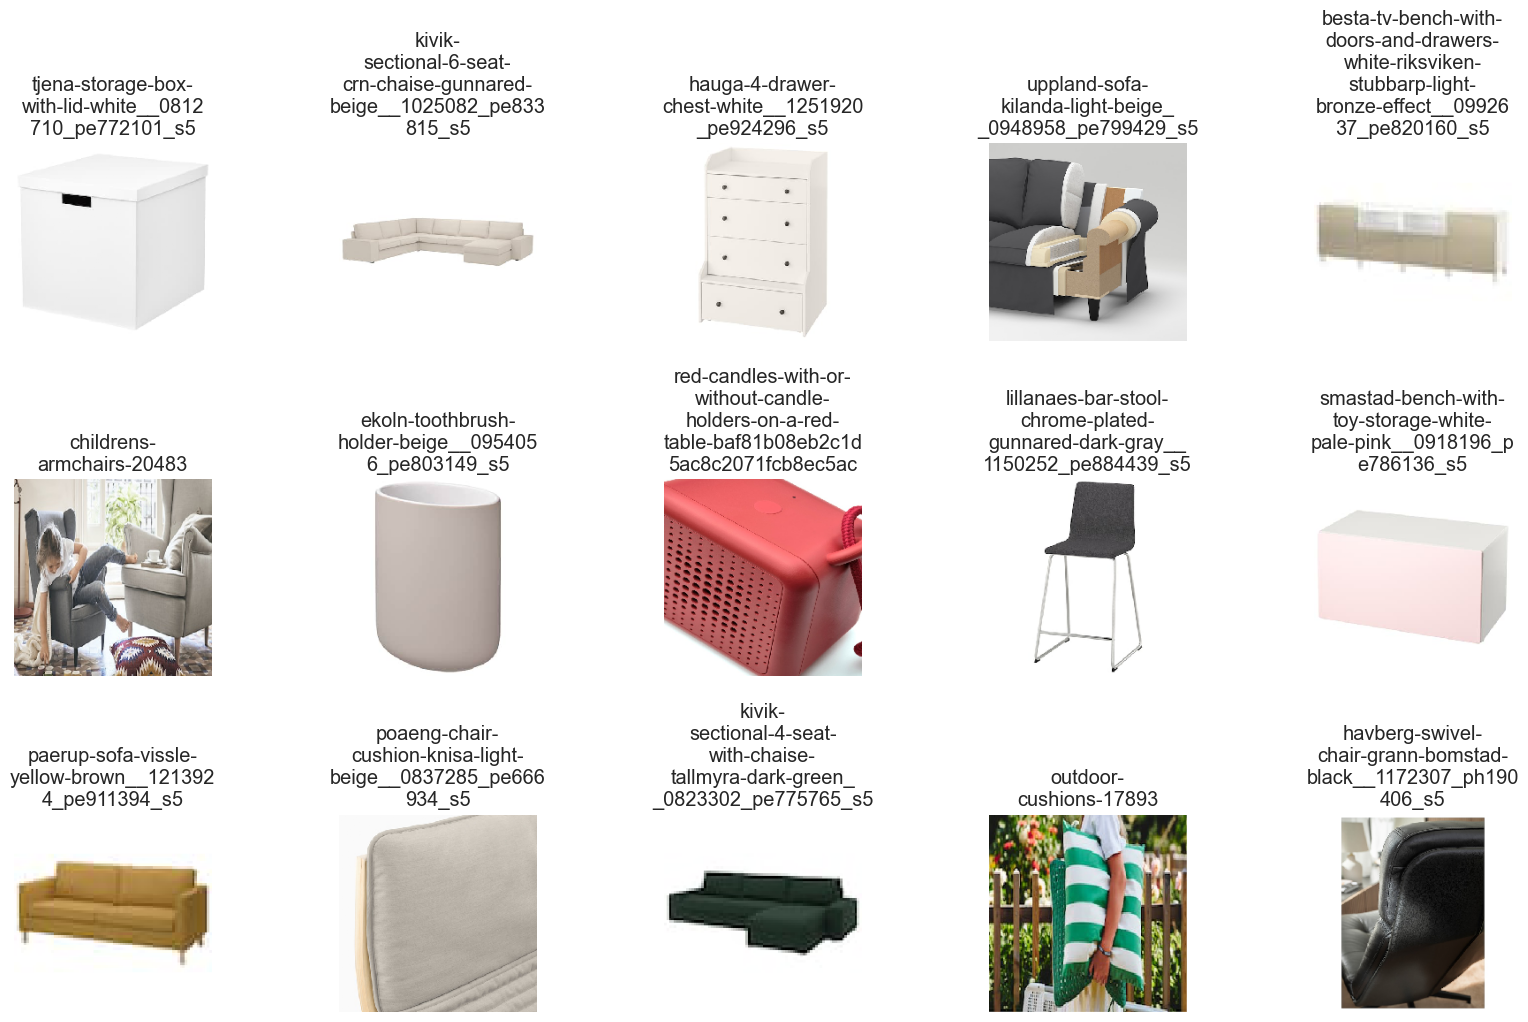

In [289]:
display_images(data.sample(15))

# Caption Text Preprocessing

In [175]:
def text_preprocessing(data):
    data['caption'] = data['caption'].apply(lambda x: x.lower())
    data['caption'] = data['caption'].apply(lambda x: x.replace("[^A-Za-z]",""))
    data['caption'] = data['caption'].apply(lambda x: x.replace("\s+"," "))
    data['caption'] = data['caption'].apply(lambda x: " ".join([word for word in x.split() if len(word)>1]))
    data['caption'] = data['caption'].apply(lambda x: x.replace("\s+"," "))
    data['caption'] = data['caption'].apply(lambda x: ' '.join(word.replace('-', ' ') for word in x.split()))
    data['caption'] = data['caption'].apply(lambda x: re.sub(r'\b[a-f0-9]{32}\b', '', x))
    data = data[data['caption'].str.strip() != '']
    data['caption'] = data['caption'].apply(lambda x: re.sub(r'__[a-zA-Z0-9_]+$', '', x))

    data['caption'] = "startseq "+data['caption']+" endseq"
    
    return data

In [292]:
data = text_preprocessing(data)
captions = data['caption'].tolist()
data.shape

(4059, 2)

# Tokenization

In [178]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(captions)
vocab_size = len(tokenizer.word_index) + 1
max_length = max(len(caption.split()) for caption in captions)

images = data['image'].unique().tolist()
nimages = len(images)

split_index = round(0.85*nimages)
train_images = images[:split_index]
val_images = images[split_index:]

train = data[data['image'].isin(train_images)]
test = data[data['image'].isin(val_images)]

train.reset_index(inplace=True,drop=True)
test.reset_index(inplace=True,drop=True)

tokenizer.texts_to_sequences([captions[1]])[0]

[1, 356, 400, 401, 357, 455, 2]

# Image Feature Extraction

### DenseNet-201 refers to a specific convolutional neural network (CNN)
### DenseNet-201 specifically has 201 layers in its architecture

In [179]:
model = DenseNet201()
fe = Model(inputs=model.input, outputs=model.layers[-2].output)

img_size = 224
features = {}
for image in tqdm(data['image'].unique().tolist()):
    img = load_img(os.path.join(r"C:\\Users\\ariel\\Desktop\\IkeaImages\\images\\" + image),target_size=(img_size,img_size))
    img = img_to_array(img)
    img = img/255.
    img = np.expand_dims(img,axis=0)
    feature = fe.predict(img, verbose=0)
    features[image] = feature

100%|██████████████████████████████████████████████████████████████████████████████| 4002/4002 [34:29<00:00,  1.93it/s]


# Data Generation

In [180]:
class CustomDataGenerator(Sequence):
    
    def __init__(self, df, X_col, y_col, batch_size, directory, tokenizer, 
                 vocab_size, max_length, features,shuffle=True):
    
        self.df = df.copy()
        self.X_col = X_col
        self.y_col = y_col
        self.directory = directory
        self.batch_size = batch_size
        self.tokenizer = tokenizer
        self.vocab_size = vocab_size
        self.max_length = max_length
        self.features = features
        self.shuffle = shuffle
        self.n = len(self.df)
        
    def on_epoch_end(self):
        if self.shuffle:
            self.df = self.df.sample(frac=1).reset_index(drop=True)
    
    def __len__(self):
        return self.n // self.batch_size
    
    def __getitem__(self,index):
    
        batch = self.df.iloc[index * self.batch_size:(index + 1) * self.batch_size,:]
        X1, X2, y = self.__get_data(batch)        
        return (X1, X2), y
    
    def __get_data(self,batch):
        
        X1, X2, y = list(), list(), list()
        
        images = batch[self.X_col].tolist()
           
        for image in images:
            feature = self.features[image][0]
            
            captions = batch.loc[batch[self.X_col]==image, self.y_col].tolist()
            for caption in captions:
                seq = self.tokenizer.texts_to_sequences([caption])[0]

                for i in range(1,len(seq)):
                    in_seq, out_seq = seq[:i], seq[i]
                    in_seq = pad_sequences([in_seq], maxlen=self.max_length)[0]
                    out_seq = to_categorical([out_seq], num_classes=self.vocab_size)[0]
                    X1.append(feature)
                    X2.append(in_seq)
                    y.append(out_seq)
            
        X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                
        return X1, X2, y

# Image Embedding

In [181]:
input1 = Input(shape=(1920,))
input2 = Input(shape=(max_length,))

img_features = Dense(256, activation='relu')(input1)
img_features_reshaped = Reshape((1, 256), input_shape=(256,))(img_features)

sentence_features = Embedding(vocab_size, 256, mask_zero=False)(input2)
merged = concatenate([img_features_reshaped,sentence_features],axis=1)
sentence_features = LSTM(256)(merged)
x = Dropout(0.5)(sentence_features)
x = add([x, img_features])
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(vocab_size, activation='softmax')(x)

caption_model = Model(inputs=[input1,input2], outputs=output)
caption_model.compile(loss='categorical_crossentropy',optimizer='adam')

In [185]:
caption_model.summary()

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)   │ (None, 1920)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_3 (Dense)               │ (None, 256)               │         491,776 │ input_layer_12[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_13 (InputLayer)   │ (None, 19)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ reshape_1 (Reshape)           │ (None, 1, 256)            │               0 │ dense_3[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_1 (Embedding)       │ (None, 19, 256)           │         705,792 │ input_layer_13[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_1 (Concatenate)   │ (None, 20, 256)           │               0 │ reshape_1[0][0],           │
│                               │                           │                 │ embedding_1[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm_1 (LSTM)                 │ (None, 256)               │         525,312 │ concatenate_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_2 (Dropout)           │ (None, 256)               │               0 │ lstm_1[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_1 (Add)                   │ (None, 256)               │               0 │ dropout_2[0][0],           │
│                               │                           │                 │ dense_3[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_4 (Dense)               │ (None, 128)               │          32,896 │ add_1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_3 (Dropout)           │ (None, 128)               │               0 │ dense_4[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_5 (Dense)               │ (None, 2757)              │         355,653 │ dropout_3[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,111,429 (8.05 MB)

 Trainable params: 2,111,429 (8.05 MB)

 Non-trainable params: 0 (0.00 B)

# The Model

In [186]:
train_generator = CustomDataGenerator(df=train,X_col='image',y_col='caption',batch_size=64,directory=r"C:\\Users\\ariel\\Desktop\\IkeaImages\\images\\" + image,
                                      tokenizer=tokenizer,vocab_size=vocab_size,max_length=max_length,features=features)

validation_generator = CustomDataGenerator(df=test,X_col='image',y_col='caption',batch_size=64,directory=r"C:\\Users\\ariel\\Desktop\\IkeaImages\\images\\" + image,
                                      tokenizer=tokenizer,vocab_size=vocab_size,max_length=max_length,features=features)

In [187]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

model_name = 'model.h5.keras'
checkpoint = ModelCheckpoint(model_name,
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)

earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.00000001)


In [188]:
# Fit the model
history = caption_model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[checkpoint, earlystopping, learning_rate_reduction]
)


Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 632ms/step - loss: 7.0203
Epoch 1: val_loss improved from inf to 5.72329, saving model to model.h5.keras
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 706ms/step - loss: 7.0094 - val_loss: 5.7233 - learning_rate: 0.0010
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - loss: 5.3387
Epoch 2: val_loss improved from 5.72329 to 5.35173, saving model to model.h5.keras
53/53 ━━━━━━━━━━━━━━━━━━━━ 28s 518ms/step - loss: 5.3358 - val_loss: 5.3517 - learning_rate: 0.0010
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - loss: 4.6561
Epoch 3: val_loss improved from 5.35173 to 5.09536, saving model to model.h5.keras
53/53 ━━━━━━━━━━━━━━━━━━━━ 30s 562ms/step - loss: 4.6535 - val_loss: 5.0954 - learning_rate: 0.0010
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step - loss: 4.1014
Epoch 4: val_loss improved from 5.09536 to 5.02848, saving model to model.h5.keras
53/53 ━━━━━━━━━━━━━━━━━━━━ 28s 521ms/step - loss: 4.0997 - val_loss: 5.0285 - learning_rate: 0.0010
Epoc

# Learning Curve

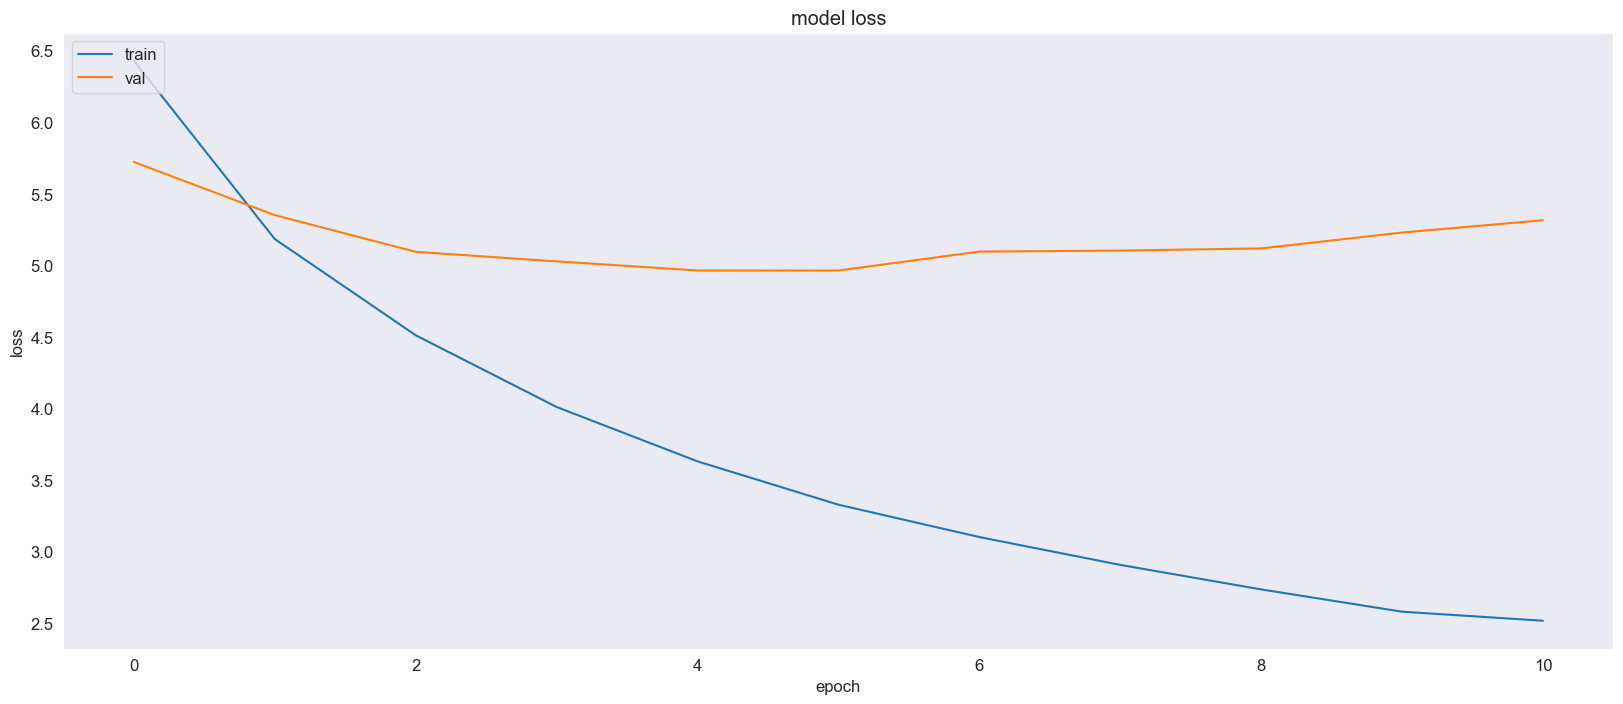

In [189]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Caption Generation

In [190]:
def idx_to_word(integer,tokenizer):
    
    for word, index in tokenizer.word_index.items():
        if index==integer:
            return word
    return None

In [191]:
def predict_caption(model, image, tokenizer, max_length, features):
    
    feature = features[image]
    in_text = "startseq"
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], max_length)

        y_pred = model.predict([feature,sequence])
        y_pred = np.argmax(y_pred)
        
        word = idx_to_word(y_pred, tokenizer)
        
        if word is None:
            break
            
        in_text+= " " + word
        
        if word == 'endseq':
            break
            
    return in_text 

In [235]:
samples = test.sample(15)
samples.reset_index(drop=True,inplace=True)

# Caption Prediction

In [237]:
for index,record in samples.iterrows():
    img = load_img("C:\\Users\\ariel\\Desktop\\IkeaImages\\images\\" + samples['image'][index],target_size=(224,224))
    img = img_to_array(img)
    img = img/255.
    
    caption = predict_caption(caption_model, samples['image'][index], tokenizer, max_length, features)
    samples.loc[index,'caption'] = caption

image      visit-ikeas-pinterest-page-99b4b4792b6346533e05c4a874c9634c.png
caption                        startseq visit ikeas pinterest page  endseq
Name: 0, dtype: object
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
image      soederhamn-sofa-with-open-end-tallmyra-light-green__0677564_pe718966_s5.jpg
caption             startseq soederhamn sofa with open end tallmyra light green endseq
Name: 1, dtype: object
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
image      uppland-sofa-kelinge-gray-turquoise__0928381_pe789853_s5.jpg
caption             startseq uppland sofa kelinge gray turquoise endseq
Name: 2, dtype: object
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
image      the-bottom-of-a-beige-curtain-and-a-sheer-white-silverloenn--78a01828702a4e6707ed5b193abb8aa1.jpg
caption                        startseq the bottom of a beige curtain and a sheer white silverloenn   endseq
Name: 12, dtype: object
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
image      variera-lazy-susan__1098191_pe865311_s5.jpg
caption             startseq variera lazy susan endseq
Name: 13, dtype: object
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
image                 toy-storage-20474.jpeg
caption    startseq toy storage 20474 endseq
Na

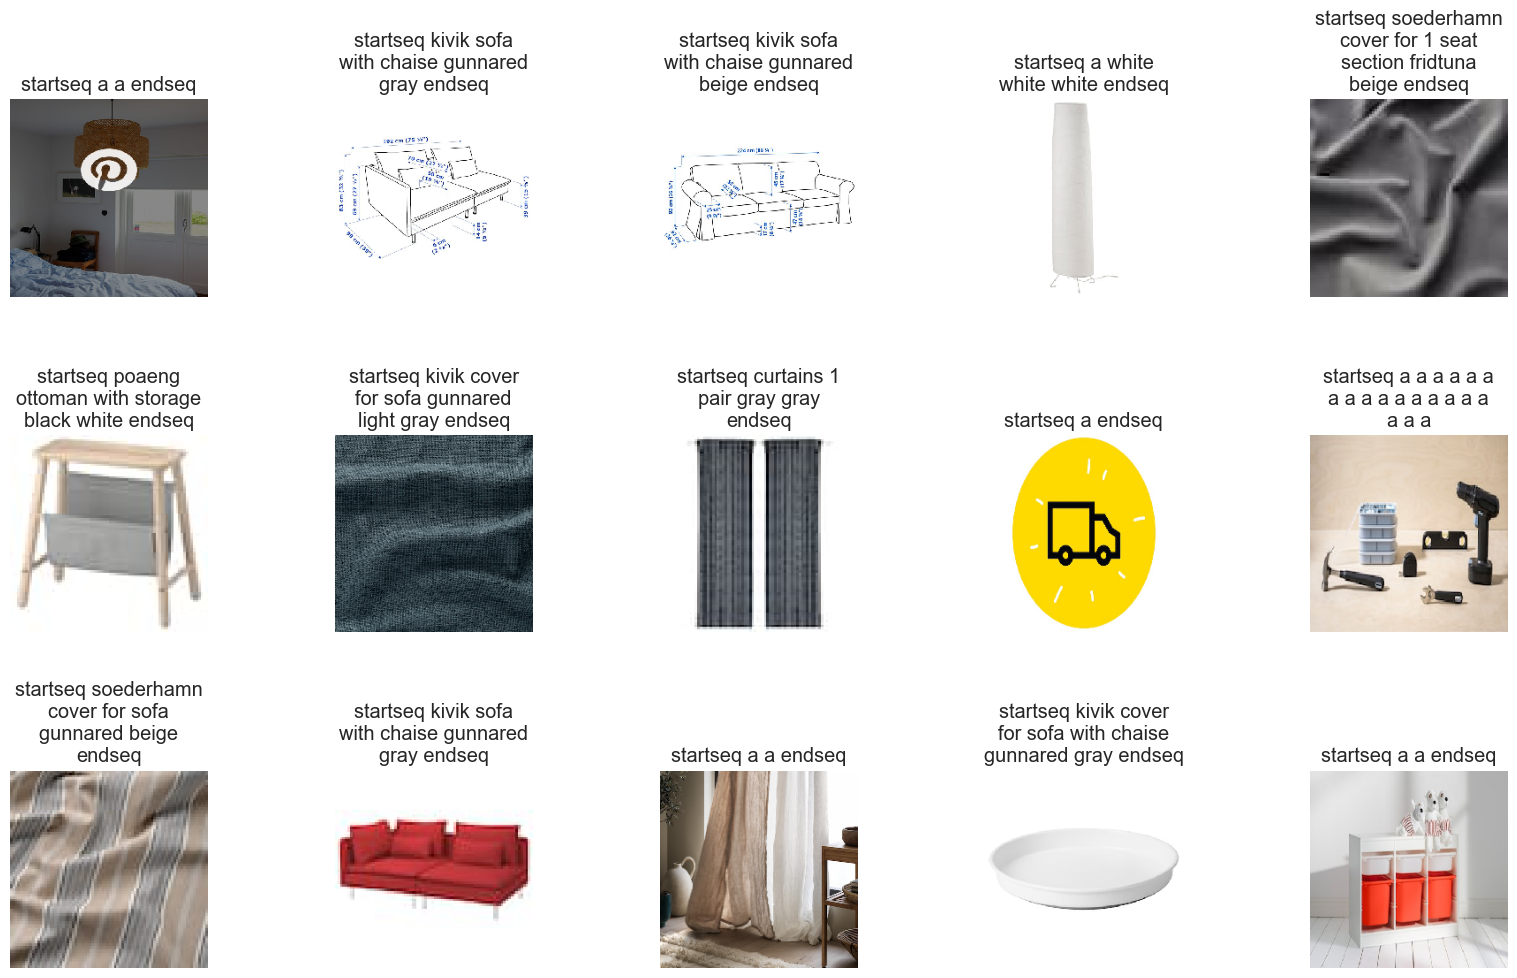

In [239]:
display_images(samples)

# Caption Evaluation with BLEU & Rouge Score

In [241]:
references = [[caption] for caption in captions]
predictions = samples["caption"].tolist()

In [242]:
from nltk.translate.bleu_score import corpus_bleu
# Assuming 'references' is a list of lists containing reference captions
# and 'predictions' is a list of lists containing predicted captions
bleu_score = corpus_bleu(references[:15], predictions)
print("BLEU Score:", bleu_score)

BLEU Score: 0.2612382332469254


In [283]:
# !pip install rouge
from rouge import Rouge 
references = captions

# Initialize ROUGE scorer 
rouge = Rouge()

# Calculate ROUGE scores
scores = rouge.get_scores(predictions, references[:15], avg=True) 

# Print results 
print(scores)

{'rouge-1': {'r': 0.26387168387168386, 'p': 0.5131481481481482, 'f': 0.3160204858968504}, 'rouge-2': {'r': 0.02187257187257187, 'p': 0.1111111111111111, 'f': 0.03619047544450493}, 'rouge-l': {'r': 0.25720501720501715, 'p': 0.5064814814814815, 'f': 0.30935381923018374}}


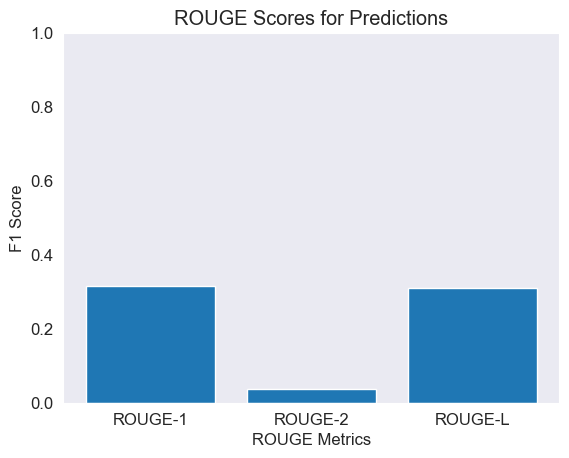

In [284]:
# Extract ROUGE scores
rouge_1_f = scores['rouge-1']['f']  # ROUGE-1 F1 score
rouge_2_f = scores['rouge-2']['f']  # ROUGE-2 F1 score
rouge_l_f = scores['rouge-l']['f']  # ROUGE-L F1 score

# Plotting the scores
metrics = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']
scores = [rouge_1_f, rouge_2_f, rouge_l_f]

plt.bar(metrics, scores)
plt.xlabel('ROUGE Metrics')
plt.ylabel('F1 Score')
plt.title('ROUGE Scores for Predictions')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.show()